In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from fastbook import *
from katlas.core import *
from katlas.train import *
from katlas.plot import *
from katlas.feature import *
from sklearn.model_selection import StratifiedGroupKFold
import seaborn as sns

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# T5 kinase feature + aa rdkit

> Use protein featurees from T5 model and aa features from rdkit descriptors

## Prepare dataset

### Amino acid

In [ ]:
aa = Data.get_aa_feature()

In [ ]:
aa.head()

aa  MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed  \
0  A           9.574074           1.193554        0.430590 -0.375462   
1  C           9.756435          -0.594121        0.396312 -0.623715   
2  D           9.846435           0.536545        0.158193 -0.369303   
3  E           9.993880          -1.144174        0.263960 -0.056770   
4  F          10.378642           0.050359        0.433525  1.825444   

      MolWt  MinPartialCharge  MaxAbsPartialCharge  FpDensityMorgan1  \
0 -1.439770          0.228166            -0.308911          1.656688   
1 -0.643882          0.233514            -0.311825          1.656688   
2 -0.347487          0.037668            -0.205110         -1.033743   
3  0.000656          0.028134            -0.199915         -1.248978   
4  0.448946          0.231079            -0.310499         -1.168265   

   FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
0          0.103007         -0.780051    -0.526903      1.203883   
1          1.401076          0.150357     1.981889      1.146308   
2         -1.273733         -1.372129    -0.525782      0.115873   
3         -1.218664         -0.661636    -0.526379     -0.271923   
4         -0.723037          0.404105    -0.526883     -0.818551   

   BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRLOW  \
0     -1.415519      1.465101      -1.347549        1.162418      0.678178   
1     -0.628535      0.696026      -0.795604        0.077060      0.765682   
2      0.346261      0.398995      -0.516138       -0.084662     -3.545366   
3      0.069844      0.109885      -0.172745        0.256753     -0.437180   
4     -0.069808     -0.311742       0.192350       -0.048318      0.413831   

     AvgIpc  BalabanJ   BertzCT  HallKierAlpha    Kappa2    Kappa3  PEOE_VSA1  \
0 -1.660842  0.058766 -0.928528       0.661861 -1.704924 -1.164169  -1.088274   
1 -0.684106  0.233728 -0.790419       1.460660 -0.601392 -0.581437  -1.088274   
2 -0.722995  0.822870 -0.281516      -0.547747 -0.442263  0.200980   0.373629   
3 -0.085041  0.534017 -0.174262      -0.547747  0.361706  0.487383   0.373629   
4  0.726870 -1.313071  0.839266      -1.118318  0.399290 -0.669480  -1.088274   

   PEOE_VSA10  PEOE_VSA11  PEOE_VSA12  PEOE_VSA14  PEOE_VSA2  PEOE_VSA3  \
0   -0.113045   -0.213201   -0.308607   -0.521596  -0.682582  -0.458413   
1   -0.113045   -0.213201   -0.308607   -0.521596  -0.682582  -0.458413   
2   -0.113045   -0.213201   -0.308607    1.500960   1.050911  -0.458413   
3   -0.113045   -0.213201   -0.308607    1.500960   1.050911  -0.458413   
4   -0.113045   -0.213201   -0.308607   -0.521596  -0.682582  -0.458413   

   PEOE_VSA4  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  PEOE_VSA9  SMR_VSA10  SMR_VSA3  \
0  -0.308393  -0.647398  -0.224260  -0.480351  -0.694405  -0.882977 -0.432331   
1   3.364183  -0.647398  -1.107502   0.556864  -0.694405   2.015850 -0.432331   
2  -0.308393  -0.647398  -1.107502  -0.480351   1.110102   0.487224 -0.432331   
3  -0.308393  -0.647398  -0.288416   0.677296  -0.694405   0.487224 -0.432331   
4  -0.308393   2.903823   0.421299  -0.480351  -0.694405  -0.882977 -0.432331   

   SMR_VSA4  SMR_VSA5  SMR_VSA6  SMR_VSA7  SlogP_VSA1  SlogP_VSA2  SlogP_VSA3  \
0 -0.495561 -0.290532 -0.695145 -0.511968   -0.482124   -1.373429   -0.884527   
1 -0.495561 -1.340339  0.914158 -0.511968   -0.482124   -0.257709   -0.884527   
2 -0.495561 -0.366786 -0.695145 -0.511968   -0.482124    0.774640    0.433147   
3 -0.495561  0.606766 -0.695145 -0.511968   -0.482124    0.774640    0.433147   
4 -0.495561 -0.366786 -0.695145  2.309694   -0.482124   -1.373429    0.880095   

   SlogP_VSA4  SlogP_VSA8  EState_VSA1  EState_VSA10  EState_VSA2  \
0    -0.45843   -0.213201    -0.535127     -0.661160    -0.922850   
1    -0.45843   -0.213201    -0.535127     -0.661160     0.310554   
2    -0.45843   -0.213201     1.741627      1.556719    -0.922850   
3    -0.45843   -0.213201     0.561766      1.556719     1.830379   
4

In [ ]:
# Use PCA to reduce dimension
aa_pca = get_pca(aa,5)

In [ ]:
aa_pca.head()

aa   aa_PCA1   aa_PCA2   aa_PCA3   aa_PCA4   aa_PCA5
0  A -4.852031 -2.249919 -0.461327 -1.416531 -0.337914
1  C -3.213352 -1.699523  3.189200 -0.265951  1.811946
2  D  3.050048 -4.495225 -0.743766 -2.307944 -2.553905
3  E  2.873347 -2.344768 -1.216389 -1.371575 -2.786402
4  F -0.630406  4.541536 -2.464032 -2.528216 -0.388043

get non-linear dimensionality reduction

In [ ]:
aa_umap = get_pca(aa, 5, method='umap', complexity = 5) # choose complexity=5 as it looks ok in graph

In [ ]:
aa_umap.head()

aa  aa_UMAP1  aa_UMAP2  aa_UMAP3  aa_UMAP4  aa_UMAP5
0  A  4.196027  4.374173  8.495463  3.696355  3.772664
1  C  3.522083  4.115019  8.107604  3.443943  4.011119
2  D  4.712611  5.618723  7.195964  2.083546  3.407981
3  E  4.930097  5.552770  7.433692  2.353672  3.114809
4  F  4.539424  4.351418  8.149652  3.500153  1.748608

### Kinase Protein

In [ ]:
prot = Data.get_t5()

In [ ]:
prot.head()

kinase        0        1        2         3        4        5         6  \
0    AAK1  0.07580  0.12350  0.04422  0.024140 -0.02098  0.01865 -0.051670   
1    ALK2  0.04690  0.12830  0.06396  0.010345 -0.02263  0.03310 -0.015200   
2    ALK4  0.03238  0.10706  0.05810  0.012680 -0.02887  0.03890 -0.004610   
3  ACVR2A  0.02902  0.10300  0.06104  0.005980 -0.01309  0.03710 -0.012210   
4  ACVR2B  0.02850  0.09610  0.05957 -0.003963 -0.01532  0.04172 -0.002802   

         7         8         9       10        11       12        13       14  \
0 -0.07400 -0.000197 -0.029700  0.01134 -0.004185 -0.04214  0.049400  0.07280   
1 -0.06960 -0.017290 -0.010025  0.02060  0.041930 -0.04916  0.001064  0.09344   
2 -0.06250 -0.022810  0.001199  0.02920  0.041230 -0.03534 -0.012450  0.08980   
3 -0.06070  0.004616 -0.005750  0.03012  0.015530 -0.03026  0.020650  0.08920   
4 -0.05627  0.000554 -0.006317  0.02925  0.016400 -0.02040  0.015236  0.09130   

         15       16       17       18        19       20        21       22  \
0  0.027420  0.04636 -0.01990 -0.00900 -0.006977 -0.07520  0.005665  0.06647   
1  0.014020  0.03430 -0.04120 -0.02464 -0.024900 -0.06616  0.024290  0.08057   
2  0.014175  0.02397 -0.03738 -0.02185 -0.017120 -0.07837  0.016500  0.07623   
3  0.001023  0.02223 -0.03778 -0.02028 -0.018420 -0.07530  0.010025  0.06160   
4  0.002197  0.02530 -0.03302 -0.02747 -0.018100 -0.07490  0.009125  0.05646   

         23       24       25       26       27        28        29       30  \
0 -0.017840 -0.03730 -0.03226  0.03323 -0.05087 -0.030760 -0.001089 -0.01100   
1 -0.007360 -0.02780 -0.02487  0.00440 -0.05252  0.007294  0.039150 -0.04560   
2 -0.009544 -0.02309 -0.02518  0.01286 -0.05490  0.007572  0.033260 -0.04465   
3  0.009480 -0.00740 -0.02621  0.01188 -0.05197 -0.010990  0.011390 -0.01761   
4  0.010230 -0.01065 -0.02547  0.00948 -0.05220 -0.011400  0.012505 -0.01738   

        31       32       33       34        35       36       37       38  \
0  0.09064 -0.11365 -0.02351 -0.11945  0.000322  0.04132  0.05298 -0.01056   
1  0.05453 -0.10630 -0.01567 -0.12115  0.020840  0.04745  0.05500 -0.02800   
2  0.04977 -0.10864 -0.01935 -0.12164  0.020580  0.04184  0.04560 -0.03802   
3  0.06287 -0.11206 -0.02263 -0.12110  0.013160  0.04517  0.05576 -0.01697   
4  0.05466 -0.11170 -0.02107 -0.12130  0.012440  0.04324  0.05560 -0.01339   

        39       40       41       42        43        44       45        46  \
0  0.04913 -0.02492 -0.05664 -0.02733 -0.003868 -0.008200 -0.02258 -0.014540   
1  0.04807 -0.04870 -0.05900 -0.04636  0.016850  0.013985 -0.02542 -0.006230   
2  0.03990 -0.04370 -0.04940 -0.04550  0.017240  0.002989 -0.01203 -0.007866   
3  0.06384 -0.03680 -0.03384 -0.04865  0.012250 -0.008690 -0.01128  0.009650   
4  0.06000 -0.03880 -0.03570 -0.04422  0.012920 -0.002247 -0.01207  0.010000   

         47       48       49        50        51       52       53       54  \
0 -0.013810 -0.03906 -0.01628 -0.016200 -0.005000 -0.03073 -0.06400  0.07654   
1 -0.012920 -0.02087 -0.02794 -0.020370  0.008070 -0.04230 -0.06177  0.06586   
2 -0.005350 -0.00900 -0.02072 -0.015260 -0.000166 -0.04175 -0.05075  0.06160   
3  0.007492 -0.01448 -0.01190 -0.016000  0.018690 -0.03860 -0.04422  0.06290   
4  0.006220 -0.01506 -0.01712 -0.014404  0.020430 -0.03802 -0.04562  0.05402   

         55        56       57       58        59       60       61       62  \
0  0.010170 -0.002415 -0.04470 -0.03815  0.012970 -0.03952  0.03342 -0.02351   
1 -0.001400 -0.002703 -0.05072  0.00840 -0.005947 -0.04895  0.04065 -0.03458   
2  0.005753  0.016200 -0.04965  0.00378 -0.013660 -0.04490  0.02762 -0.03302   
3  0.005080 -0.012030 -0.05173  0.01076  0.010850 -0.05283  0.02470 -0.03027   
4  0.008180 -0.011160 -0.04538  0.01940  0.011505 -0.05220  0.02690 -0.03580   

        63        64        65       66        67       68       69        70  \
0 -0.05032 -0.005207 -0.008750 -0.01398 -0.003386  0.01354 -0.02846 -0.001531   
1 -0.04210 

In [ ]:
prot_pca = get_pca(prot,32)

In [ ]:
prot_pca.head()

kinase  kinase_PCA1  kinase_PCA2  kinase_PCA3  kinase_PCA4  kinase_PCA5  \
0    AAK1    -0.257443     0.003306     0.174313    -0.180450     0.066599   
1    ALK2    -0.318117     0.107869     0.241401    -0.253591     0.191336   
2    ALK4    -0.259614     0.122514     0.225263    -0.274495     0.169574   
3  ACVR2A    -0.150220     0.073302     0.308196    -0.238646     0.105585   
4  ACVR2B    -0.142741     0.066838     0.308167    -0.226747     0.101209   

   kinase_PCA6  kinase_PCA7  kinase_PCA8  kinase_PCA9  kinase_PCA10  \
0    -0.040671     0.072411    -0.022321    -0.158461      0.016126   
1     0.081928     0.085866     0.258863     0.013557     -0.056559   
2     0.099427     0.061592     0.273495     0.019938     -0.025202   
3     0.033186     0.069499     0.221665    -0.001411     -0.032607   
4     0.050272     0.049104     0.256594     0.031584     -0.046775   

   kinase_PCA11  kinase_PCA12  kinase_PCA13  kinase_PCA14  kinase_PCA15  \
0      0.001602      0.001940      0.074536      0.062929      0.056490   
1     -0.009728     -0.077602     -0.058966      0.012335      0.082617   
2      0.001484     -0.066643     -0.055464      0.038261      0.068392   
3     -0.029324     -0.062937      0.024978      0.015695      0.046122   
4     -0.034165     -0.052981     -0.013271     -0.013530      0.026458   

   kinase_PCA16  kinase_PCA17  kinase_PCA18  kinase_PCA19  kinase_PCA20  \
0     -0.117808      0.082937      0.057554      0.006436     -0.009828   
1      0.016051     -0.018682     -0.062738     -0.000474     -0.016463   
2      0.050005     -0.040263     -0.079164      0.005841     -0.009184   
3      0.045222     -0.000063     -0.056475      0.006407      0.017600   
4      0.037328     -0.002507     -0.053686      0.025687      0.011356   

   kinase_PCA21  kinase_PCA22  kinase_PCA23  kinase_PCA24  kinase_PCA25  \
0      0.018200     -0.082921      0.004602     -0.036563     -0.034217   
1      0.029049     -0.007748      0.068413      0.037528     -0.044291   
2      0.056532     -0.010647      0.060022      0.056213     -0.026674   
3      0.060899     -0.005433      0.042441     -0.026994     -0.061796   
4      0.066945      0.026508      0.043499     -0.028616     -0.044195   

   kinase_PCA26  kinase_PCA27  kinase_PCA28  kinase_PCA29  kinase_PCA30  \
0     -0.026148     -0.021318     -0.068743     -0.011511      0.007623   
1     -0.030098     -0.044026      0.016366     -0.058345     -0.030301   
2     -0.004391     -0.020039     -0.011959     -0.038487     -0.000566   
3      0.001098      0.003566      0.044658      0.021587      0.021105   
4     -0.018175     -0.000692      0.049229      0.009813      0.014651   

   kinase_PCA31  kinase_PCA32  
0      0.018142      0.004552  
1      0.020697     -0.060232  
2      0.003843     -0.062162  
3      0.036287      0.022444  
4      0.010913      0.025210

In [ ]:
# non-linear reduction
prot_umap = get_pca(prot, 32, method='umap', complexity = 10)

In [ ]:
prot_umap.head()

kinase  kinase_UMAP1  kinase_UMAP2  kinase_UMAP3  kinase_UMAP4  \
0    AAK1      8.111957      4.698028      4.038908      5.359871   
1    ALK2      7.367586      4.553955      5.070401      6.097510   
2    ALK4      7.330311      4.520555      5.110065      6.134727   
3  ACVR2A      7.398767      4.552471      5.047042      6.063915   
4  ACVR2B      7.368824      4.552563      5.080451      6.096263   

   kinase_UMAP5  kinase_UMAP6  kinase_UMAP7  kinase_UMAP8  kinase_UMAP9  \
0      5.824298      6.580555      7.428004      6.219272      4.884777   
1      6.813095      6.593630      7.197180      6.904202      4.618667   
2      6.852496      6.588907      7.160292      6.943651      4.586502   
3      6.791386      6.606660      7.195818      6.871316      4.613147   
4      6.821861      6.589793      7.187504      6.905513      4.616773   

   kinase_UMAP10  kinase_UMAP11  kinase_UMAP12  kinase_UMAP13  kinase_UMAP14  \
0       6.469997       3.685524       6.429243       4.909970       5.261070   
1       6.530125       3.840534       5.608213       5.104530       5.219577   
2       6.555090       3.874163       5.568763       5.115827       5.242033   
3       6.542974       3.850627       5.638500       5.109043       5.211263   
4       6.534608       3.846291       5.605128       5.112022       5.217393   

   kinase_UMAP15  kinase_UMAP16  kinase_UMAP17  kinase_UMAP18  kinase_UMAP19  \
0       6.467200       4.744189       6.132402       6.838230       4.454731   
1       6.720739       5.084767       6.152717       6.841972       4.389723   
2       6.727362       5.102062       6.125124       6.859080       4.406729   
3       6.723366       5.106423       6.160838       6.856184       4.387239   
4       6.705184       5.087444       6.152894       6.839318       4.380758   

   kinase_UMAP20  kinase_UMAP21  kinase_UMAP22  kinase_UMAP23  kinase_UMAP24  \
0       7.108232       3.265965       5.110543       5.691772       5.445686   
1       6.960867       3.307762       4.334625       5.662792       5.553609   
2       6.984839       3.290450       4.294894       5.676423       5.588511   
3       6.946534       3.311689       4.366271       5.661069       5.559355   
4       6.956043       3.313670       4.331128       5.646558       5.559523   

   kinase_UMAP25  kinase_UMAP26  kinase_UMAP27  kinase_UMAP28  kinase_UMAP29  \
0       4.044703       5.482388       6.219580       5.326525       1.984912   
1       4.035735       5.292583       5.996681       5.225913       1.973657   
2       4.023507       5.283806       5.962287       5.239898       1.960178   
3       4.038156       5.289875       5.982518       5.213311       1.967525   
4       4.052300       5.284370       5.987660       5.222504       1.982801   

   kinase_UMAP30  kinase_UMAP31  kinase_UMAP32  
0       6.490250       5.938071       4.231542  
1       6.451420       5.867097       4.304437  
2       6.455858       5.873190       4.325958  
3       6.449653       5.862822       4.318885  
4       6.443206       5.857552       4.300774

### Target

In [ ]:
# target = Data.get_standard_unstack()

In [ ]:
target = Data.get_log_unstack()

In [ ]:
target.shape

(59994, 5)

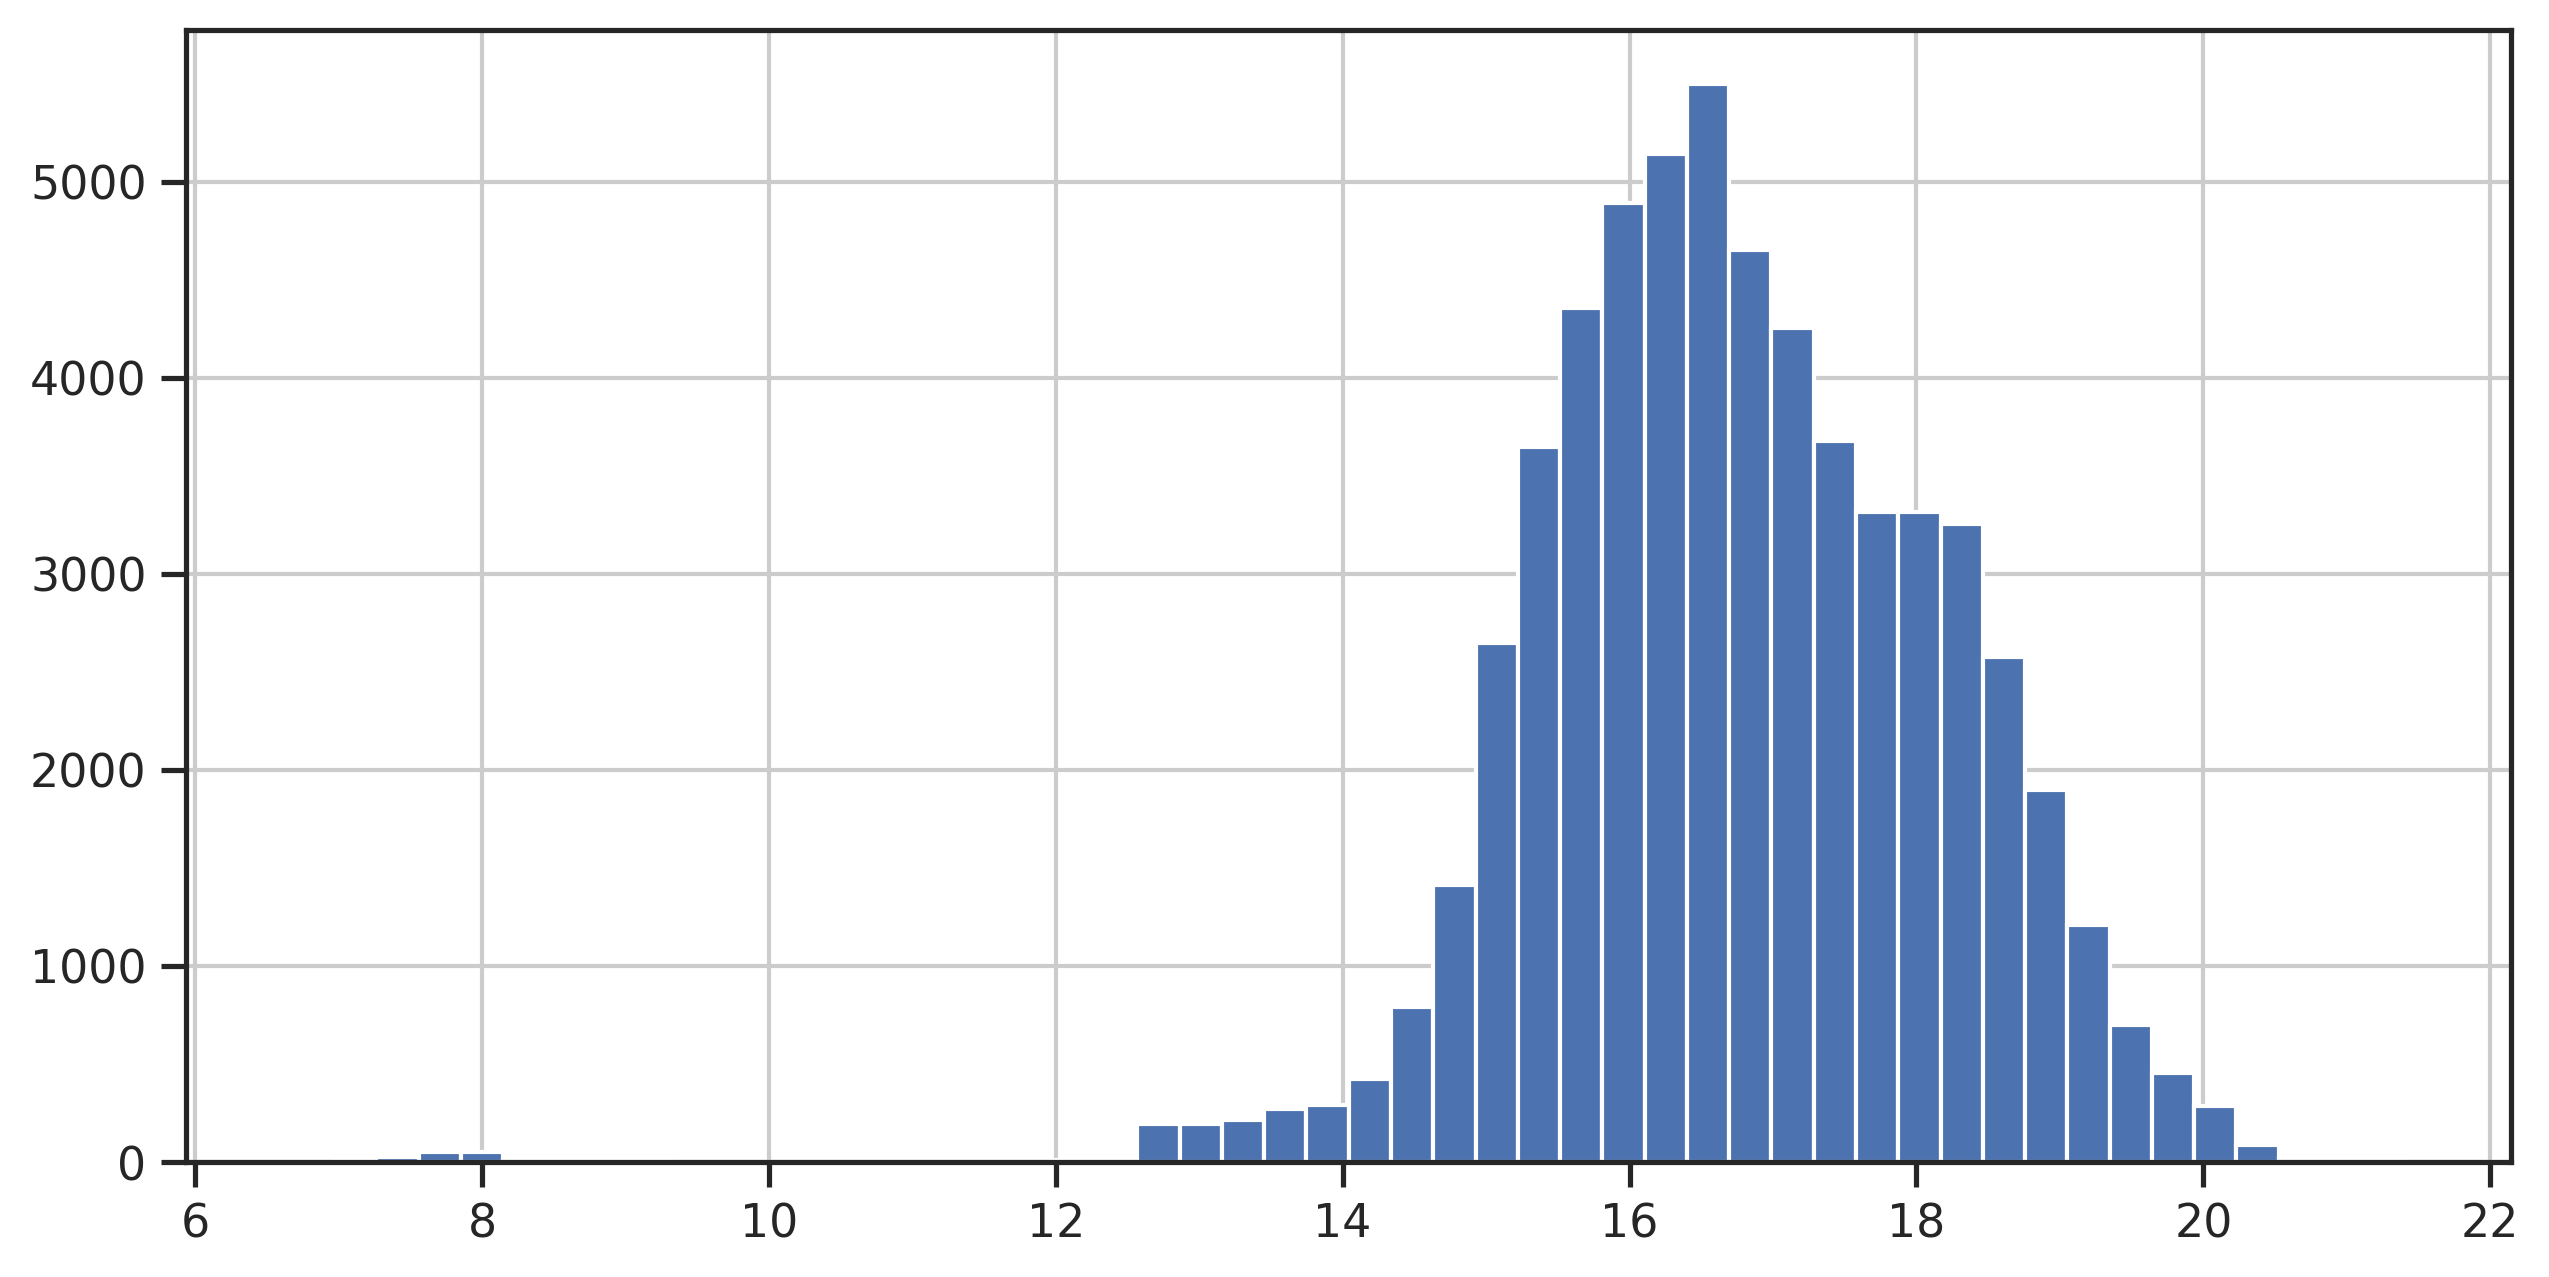

In [ ]:
target.target.hist(bins=50,figsize=(10,5));

We can remove outliers

In [ ]:
target = target.query('kinase != "CK1G2" ').reset_index(drop=True)

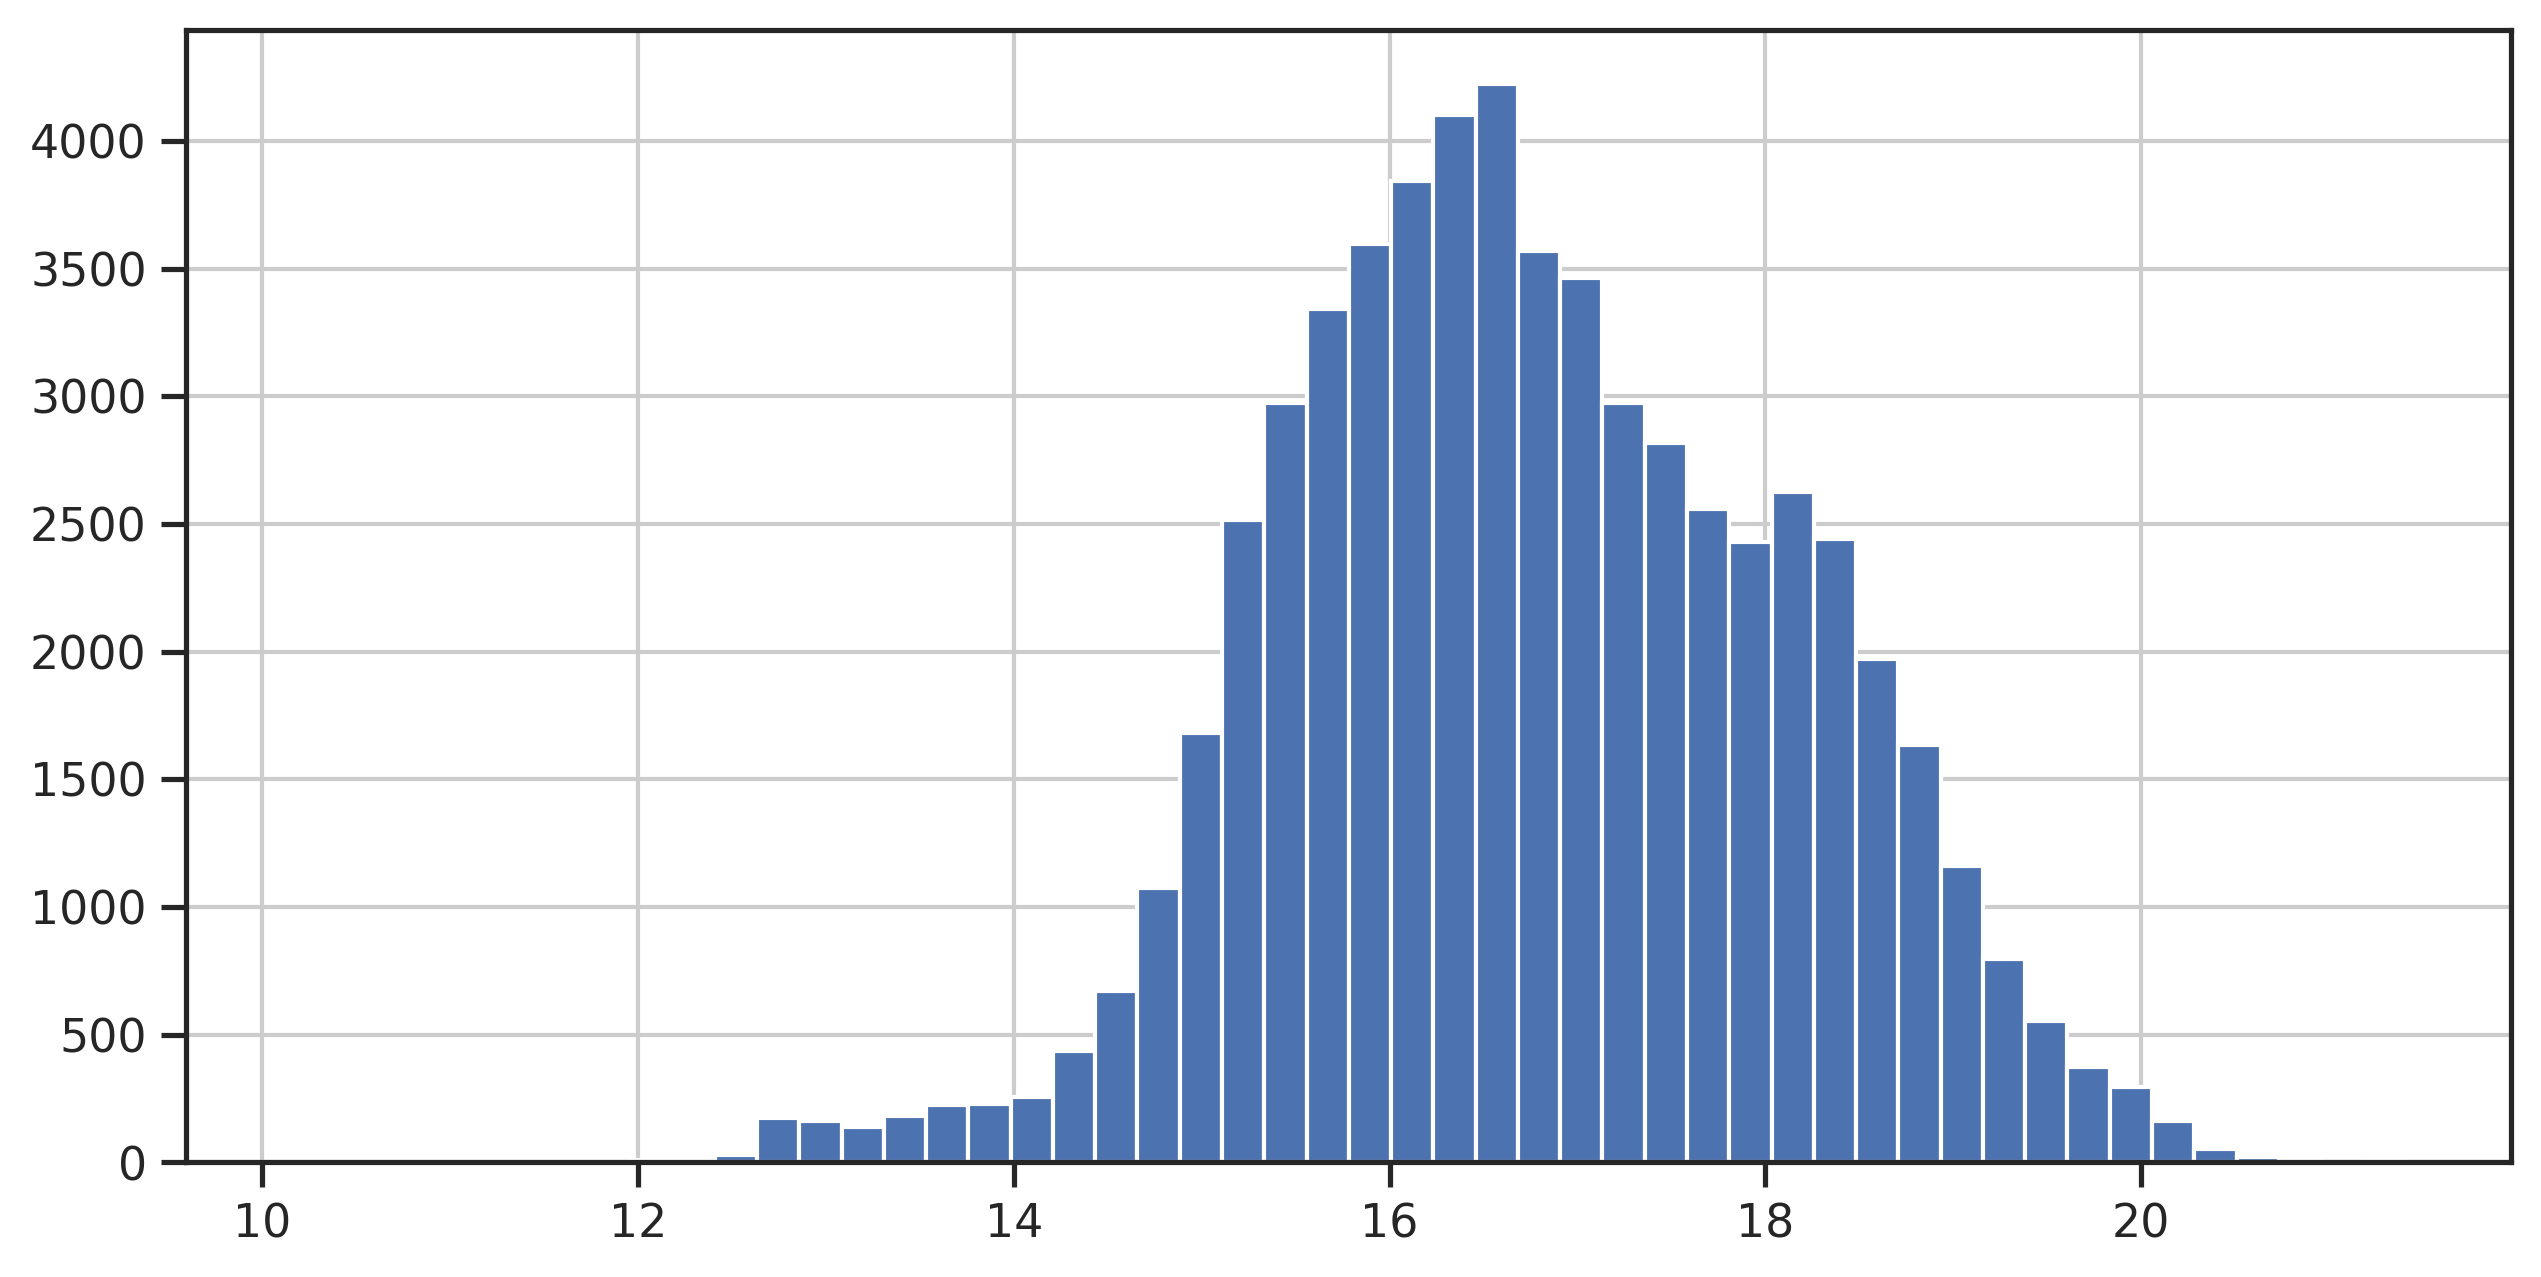

In [ ]:
target.target.hist(bins=50,figsize=(10,5));

### Concatenate all together

In [ ]:
target

kinase substrate     target  position aa
0        AAK1       -5P  15.845517        -5  P
1      ACVR2A       -5P  15.423155        -5  P
2      ACVR2B       -5P  17.091913        -5  P
3        AKT1       -5P  16.727835        -5  P
4        AKT2       -5P  15.509150        -5  P
...       ...       ...        ...       ... ..
59791   YANK2        4y  17.474915         4  y
59792   YANK3        4y  17.854397         4  y
59793    YSK1        4y  18.204623         4  y
59794    YSK4        4y  18.021762         4  y
59795     ZAK        4y  18.540396         4  y

[59796 rows x 5 columns]

In [ ]:
df = target.merge(aa_pca,'left').merge(prot_pca,'left')

In [ ]:
df

kinase substrate     target  position aa   aa_PCA1   aa_PCA2   aa_PCA3  \
0        AAK1       -5P  15.845517        -5  P -4.604141  2.659866  1.697217   
1      ACVR2A       -5P  15.423155        -5  P -4.604141  2.659866  1.697217   
2      ACVR2B       -5P  17.091913        -5  P -4.604141  2.659866  1.697217   
3        AKT1       -5P  16.727835        -5  P -4.604141  2.659866  1.697217   
4        AKT2       -5P  15.509150        -5  P -4.604141  2.659866  1.697217   
...       ...       ...        ...       ... ..       ...       ...       ...   
59791   YANK2        4y  17.474915         4  y  8.518956  2.885584  0.091211   
59792   YANK3        4y  17.854397         4  y  8.518956  2.885584  0.091211   
59793    YSK1        4y  18.204623         4  y  8.518956  2.885584  0.091211   
59794    YSK4        4y  18.021762         4  y  8.518956  2.885584  0.091211   
59795     ZAK        4y  18.540396         4  y  8.518956  2.885584  0.091211   

        aa_PCA4   aa_PCA5  kinase_PCA1  kinase_PCA2  kinase_PCA3  kinase_PCA4  \
0     -0.613948  1.642941    -0.257443     0.003306     0.174313    -0.180450   
1     -0.613948  1.642941    -0.150220     0.073302     0.308196    -0.238646   
2     -0.613948  1.642941    -0.142741     0.066838     0.308167    -0.226747   
3     -0.613948  1.642941    -0.403074    -0.056543    -0.106092     0.002882   
4     -0.613948  1.642941    -0.294243    -0.015516    -0.046013    -0.039334   
...         ...       ...          ...          ...          ...          ...   
59791 -1.775412  1.362952     0.108523    -0.162426    -0.014588    -0.049533   
59792 -1.775412  1.362952     0.167098    -0.176487     0.022368    -0.024444   
59793 -1.775412  1.362952    -0.221249     0.012172     0.004006     0.027503   
59794 -1.775412  1.362952     0.197456    -0.110835     0.043636    -0.066114   
59795 -1.775412  1.362952     0.628848     0.119643    -0.156032    -0.128659   

       kinase_PCA5  kinase_PCA6  kinase_PCA7  kinase_PCA8  kinase_PCA9  \
0         0.066599    -0.040671     0.072411    -0.022321    -0.158461   
1         0.105585     0.033186     0.069499     0.221665    -0.001411   
2         0.101209     0.050272     0.049104     0.256594     0.031584   
3        -0.052858    -0.009852    -0.148106    -0.048899     0.108033   
4        -0.064474    -0.013163    -0.156642    -0.084267     0.123221   
...            ...          ...          ...          ...          ...   
59791    -0.118865     0.068022    -0.137222    -0.055238    -0.035961   
59792    -0.121648     0.067415    -0.126858    -0.060606    -0.002079   
59793     0.098259    -0.209147     0.114150    -0.042062    -0.030075   
59794     0.043352    -0.153878     0.005270     0.026706    -0.143543   
59795     0.127912    -0.042057    -0.126270     0.120890     0.192307   

       kinase_PCA10  kinase_PCA11  kinase_PCA12  kinase_PCA13  kinase_PCA14  \
0          0.016126      0.001602      0.001940      0.074536      0.062929   
1         -0.032607     -0.029324     -0.062937      0.024978      0.015695   
2         -0.046775     -0.034165     -0.052981     -0.013271     -0.013530   
3          0.102835     -0.065699     -0.088229      0.000612     -0.042048   
4          0.026328     -0.010119     -0.052882     -0.028449     -0.016916   
...             ...           ...           ...           ...           ...   
59791      0.017651     -0.055330      0.018277      0.040782      0.005447   
59792      0.019665     -0.067430      0.003749      0.086794     -0.006346   
59793     -0.013958     -0.030522      0.053027     -0.103207     -0.015682   
59794      0.028836      0.013418     -0.006115     -0.050455      0.000433   
59795     -0.088831      0.265615      0.060839     -0.041134      0.067240   

       kinase_PCA15  kinase_PCA16  kinase_PCA17  kinase_PCA18  kinase_PCA19  \
0          0.056490     -0.117808      0.082937      0.057554      0.006436   
1          0.046122      0.045222     -0.000063     -0.056475    

In [ ]:
# check order
(df.kinase == target.kinase).value_counts()

True    59796
Name: kinase, dtype: int64

## Train

In [ ]:
show_doc(xgb_trainer)

---

### xgb_trainer

>      xgb_trainer (df, feature_col, target_col, test_index=None,
>                   xgb_params={'max_depth': 7, 'learning_rate': 0.001,
>                   'subsample': 0.8, 'colsample_bytree': 1, 'eval_metric':
>                   'rmse', 'objective': 'reg:squarederror', 'tree_method':
>                   'gpu_hist', 'predictor': 'gpu_predictor', 'random_state':
>                   123}, model_file='xgb_model.bin', split_seed=123)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  |  |
| feature_col |  |  |  |
| target_col |  |  |  |
| test_index | NoneType | None |  |
| xgb_params | dict | {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 1, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123} |  |
| model_file | str | xgb_model.bin |  |
| split_seed | int | 123 | seed of random split |

### Assign feature and target col

In [ ]:
df.columns

Index(['kinase', 'substrate', 'target', 'position', 'aa', 'aa_PCA1', 'aa_PCA2',
       'aa_PCA3', 'aa_PCA4', 'aa_PCA5', 'kinase_PCA1', 'kinase_PCA2',
       'kinase_PCA3', 'kinase_PCA4', 'kinase_PCA5', 'kinase_PCA6',
       'kinase_PCA7', 'kinase_PCA8', 'kinase_PCA9', 'kinase_PCA10',
       'kinase_PCA11', 'kinase_PCA12', 'kinase_PCA13', 'kinase_PCA14',
       'kinase_PCA15', 'kinase_PCA16', 'kinase_PCA17', 'kinase_PCA18',
       'kinase_PCA19', 'kinase_PCA20', 'kinase_PCA21', 'kinase_PCA22',
       'kinase_PCA23', 'kinase_PCA24', 'kinase_PCA25', 'kinase_PCA26',
       'kinase_PCA27', 'kinase_PCA28', 'kinase_PCA29', 'kinase_PCA30',
       'kinase_PCA31', 'kinase_PCA32'],
      dtype='object')

In [ ]:
target_col = 'target'

In [ ]:
feat_col = ['position'] + df.columns[5:].tolist()

In [ ]:
feat_col[:5]

['position', 'aa_PCA1', 'aa_PCA2', 'aa_PCA3', 'aa_PCA4']

### Randomly split

Randomly split in to 80% train and 20% valid. The disadvantage of this method is that it samples from the dataset not by individual kinase, but by each data point.

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 1, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(47836, 38) (47836,) (11960, 38) (11960,)
Int64Index([58933, 48984, 34410, 36788, 19725, 45033, 44261, 35815,  2078,
            13763,
            ...
             6531, 24243, 39897, 58947, 19716,  4417, 38041,  6821, 54208,
            28701],
           dtype='int64', length=11960)
[0]	train-rmse:16.32983	valid-rmse:16.31167
[100]	train-rmse:14.78115	valid-rmse:14.76361
[200]	train-rmse:13.37977	valid-rmse:13.36293
[300]	train-rmse:12.11144	valid-rmse:12.09529
[400]	train-rmse:10.96389	valid-rmse:10.94841
[500]	train-rmse:9.92569	valid-rmse:9.91077
[600]	train-rmse:8.98642	valid-rmse:8.97205
[700]	train-rmse:8.13674	valid-rmse:8.12282
[800]	train-rmse:7.36804	valid-rmse:7.35464
[900]	train-rmse:6.67273	valid-rmse:6.65981
[1000]	train-rmse:6.04384	valid-rm

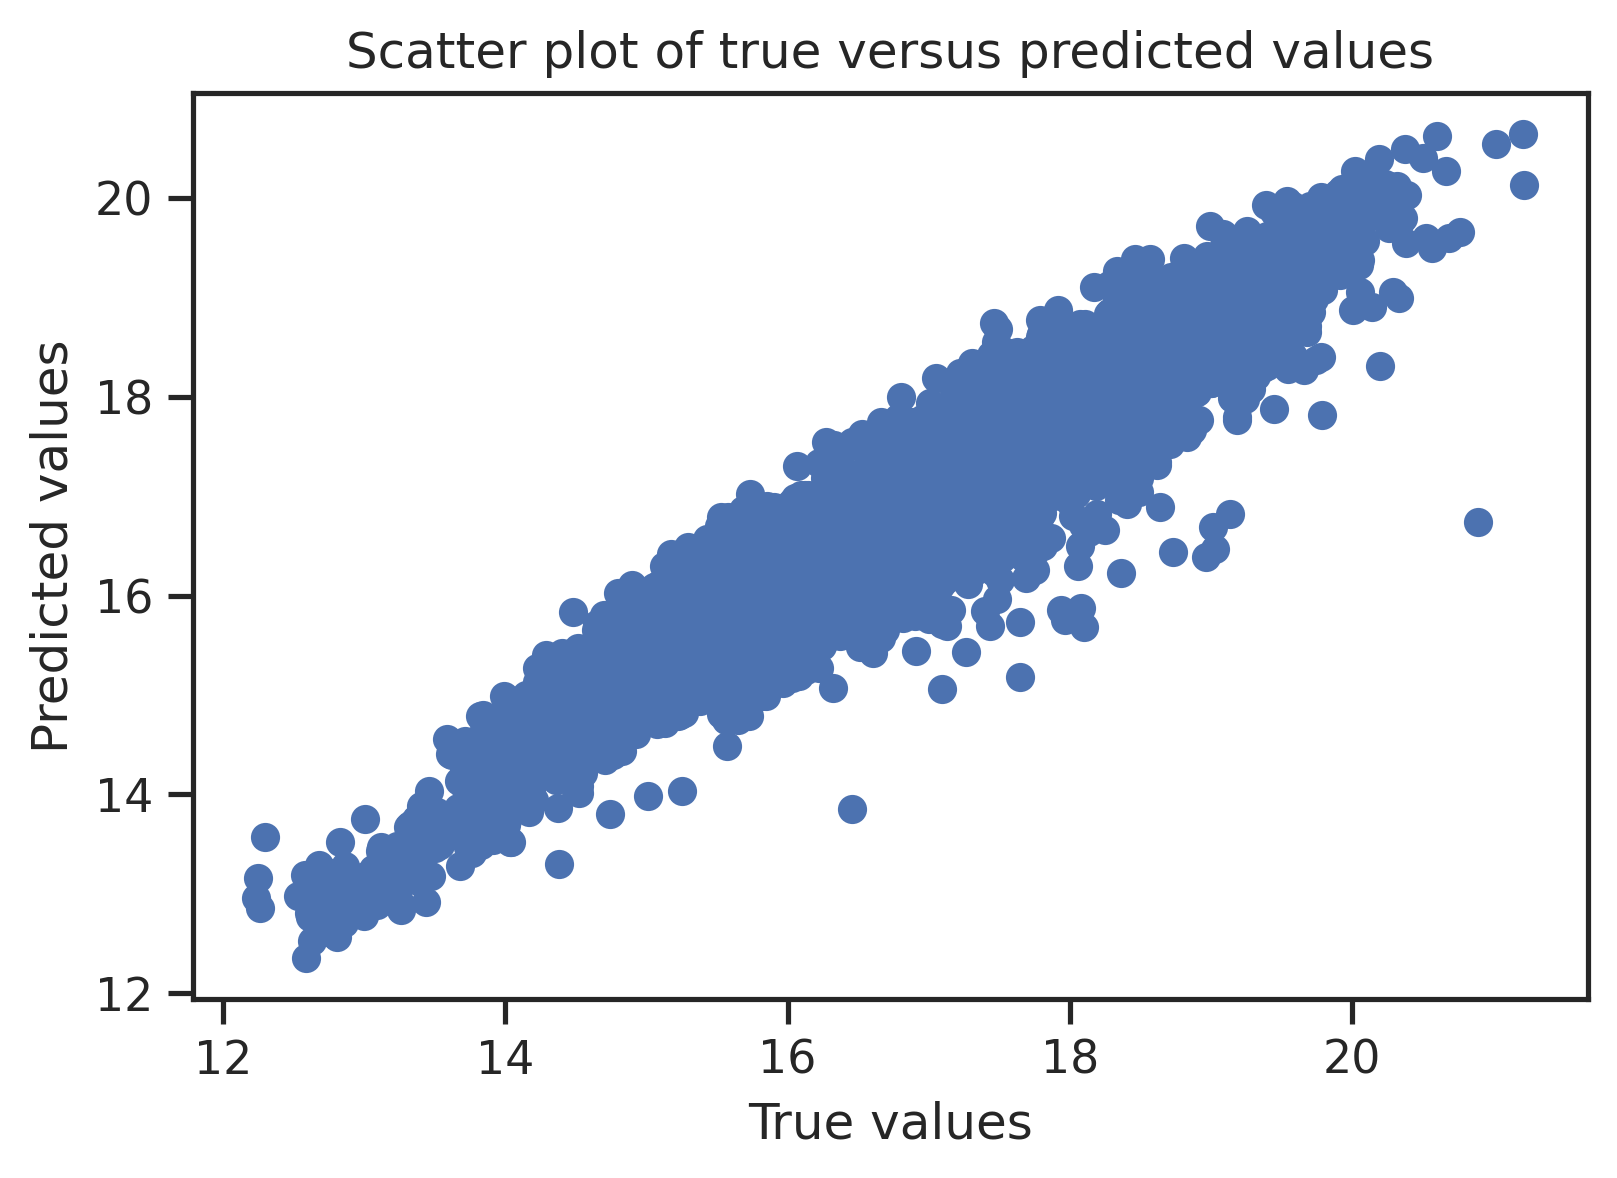

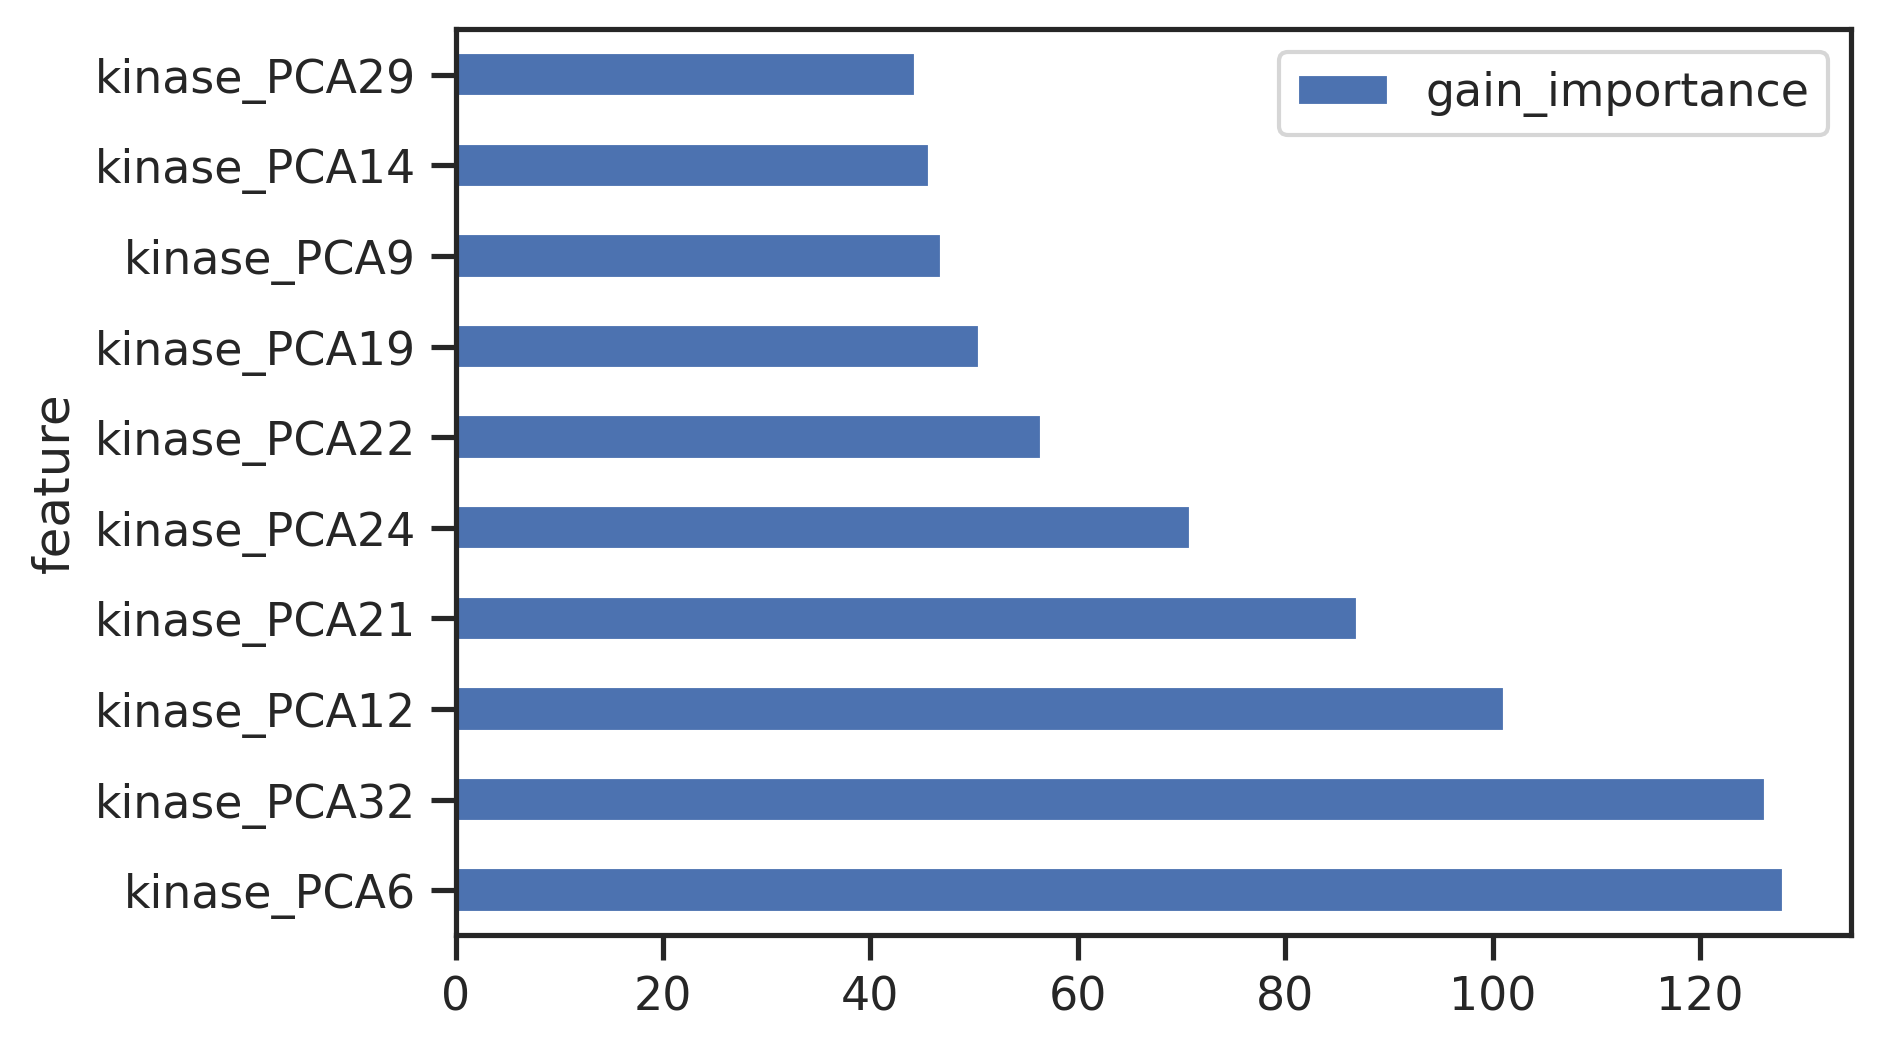

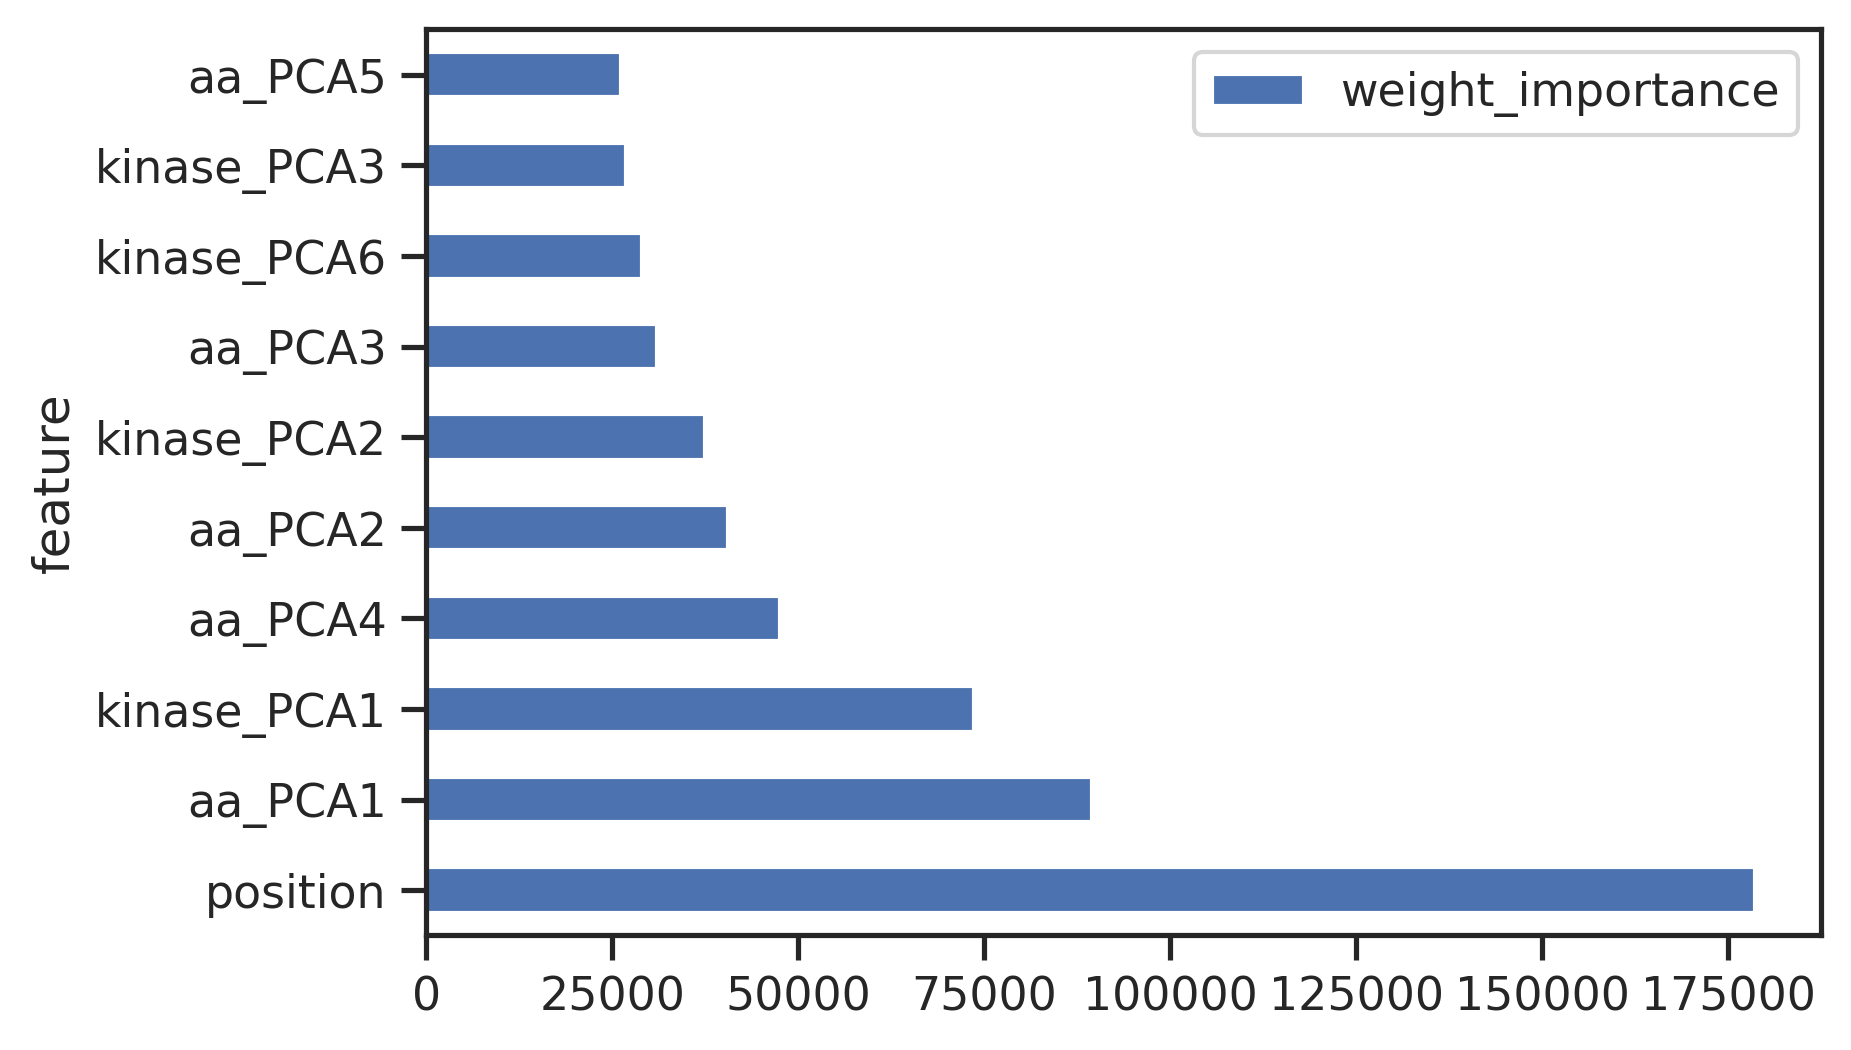

In [ ]:
pred, gain, weight = xgb_trainer(df, feat_col, target_col) #model_file = 'model/dummy.bin'

### StratifiedGroupKfold: split by group

We can use StratifiedGroupKFold to split the training and valid set: we group each point by kinase, and then stratify the kinase by their category. This split method ensures that the model:
- when validate in valid/test set, it would not see the same kinase in training set (no data leakage problem)
- during training, it learns diverse patterns of substrate specificity

In [ ]:
# prepare the dataframe for split
kinase_info = Data.get_kinase_info()

kinase_info = kinase_info[['kinase','Family','category','category_big']]

info = df[['kinase']].merge(kinase_info,'left')

(info.kinase == df.kinase).value_counts()

True    59796
Name: kinase, dtype: int64

We split data into 5 fold, with 80% train, and 20% valid. We can just train one fold; For statsitics purpose, we can train all five folds and get their variance and OOF (out of fold) to calculate overall correlation metrics.

# kinase in valid set: 61
# kinase in train set: 241
xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 1, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(47718, 38) (47718,) (12078, 38) (12078,)
Int64Index([    0,     5,    10,    15,    20,    25,    30,    36,    39,
               42,
            ...
            59748, 59755, 59758, 59763, 59769, 59775, 59779, 59782, 59790,
            59793],
           dtype='int64', length=12078)
[0]	train-rmse:16.28096	valid-rmse:16.50431
[100]	train-rmse:14.73634	valid-rmse:14.98655
[200]	train-rmse:13.33879	valid-rmse:13.61347
[300]	train-rmse:12.07421	valid-rmse:12.36826
[400]	train-rmse:10.93011	valid-rmse:11.24138
[500]	train-rmse:9.89499	valid-rmse:10.22483
[600]	train-rmse:8.95850	valid-rmse:9.30880
[700]	train-rmse:8.11138	valid-rmse:8.48081
[800]	train-rmse:7.34517	valid-rmse:7.73278
[900]	train-rmse:6.65212

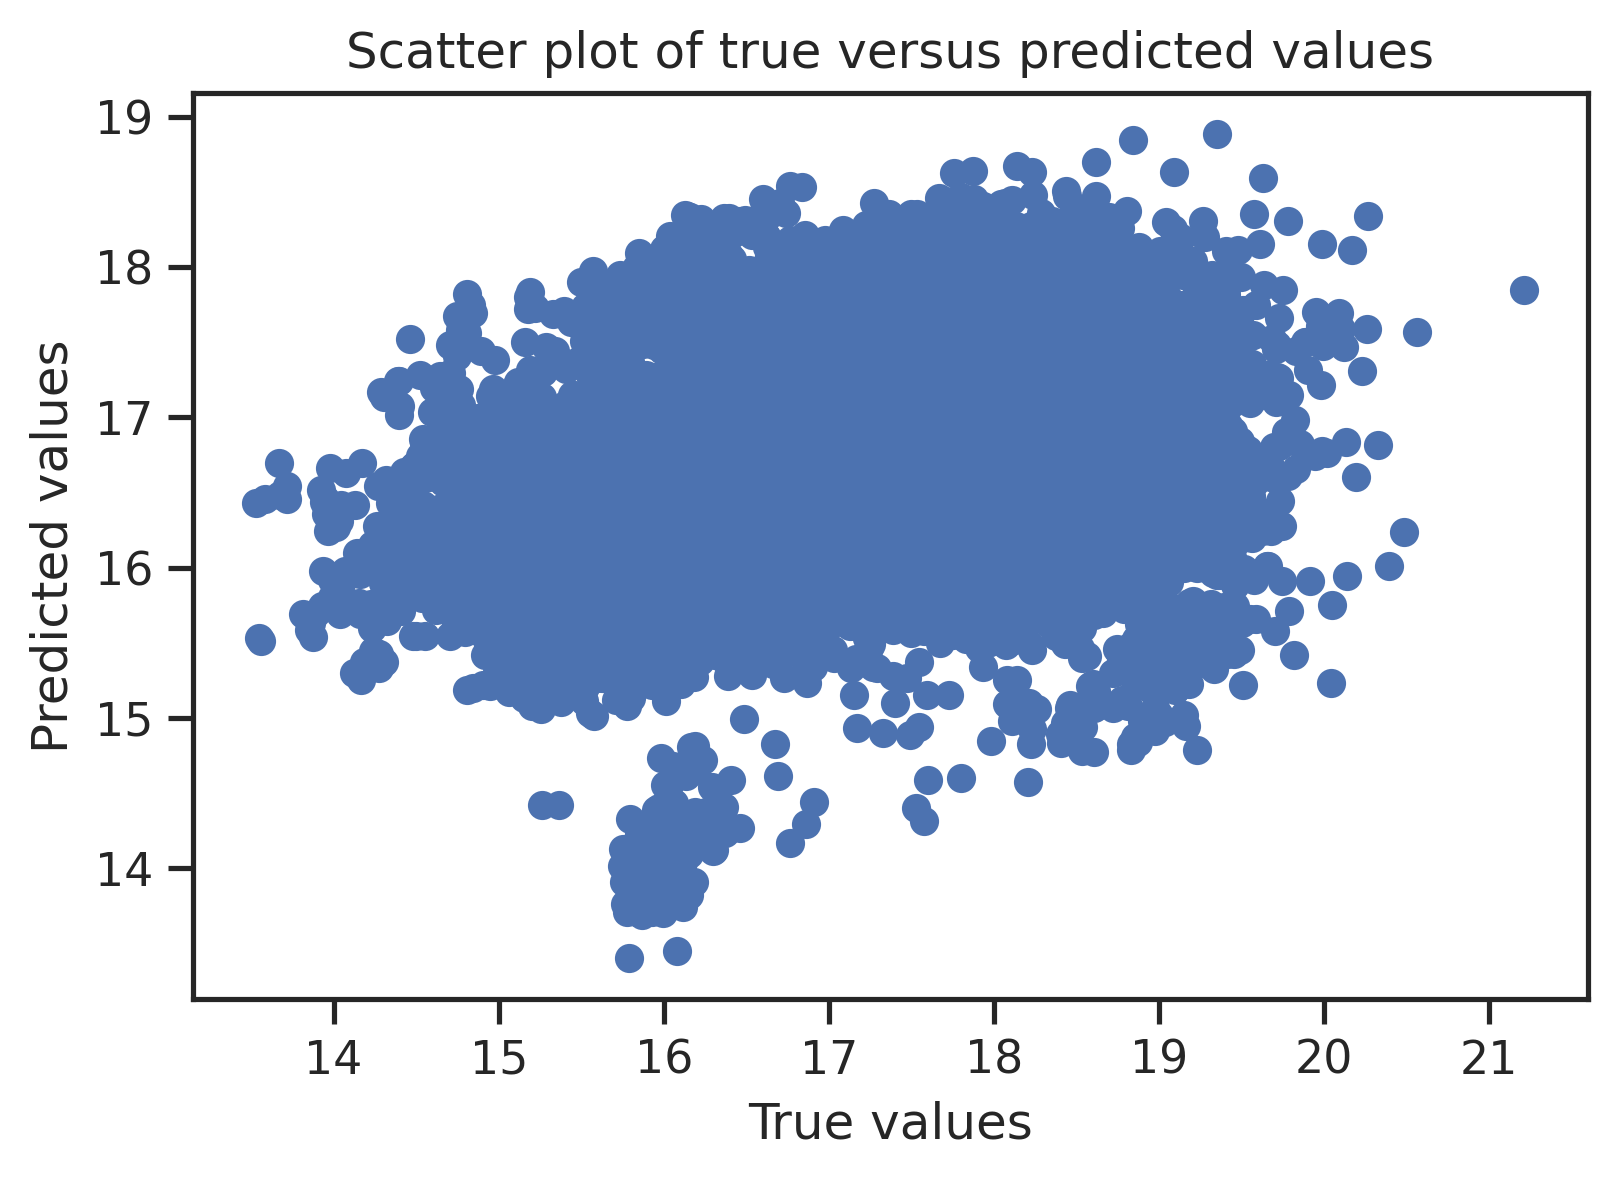

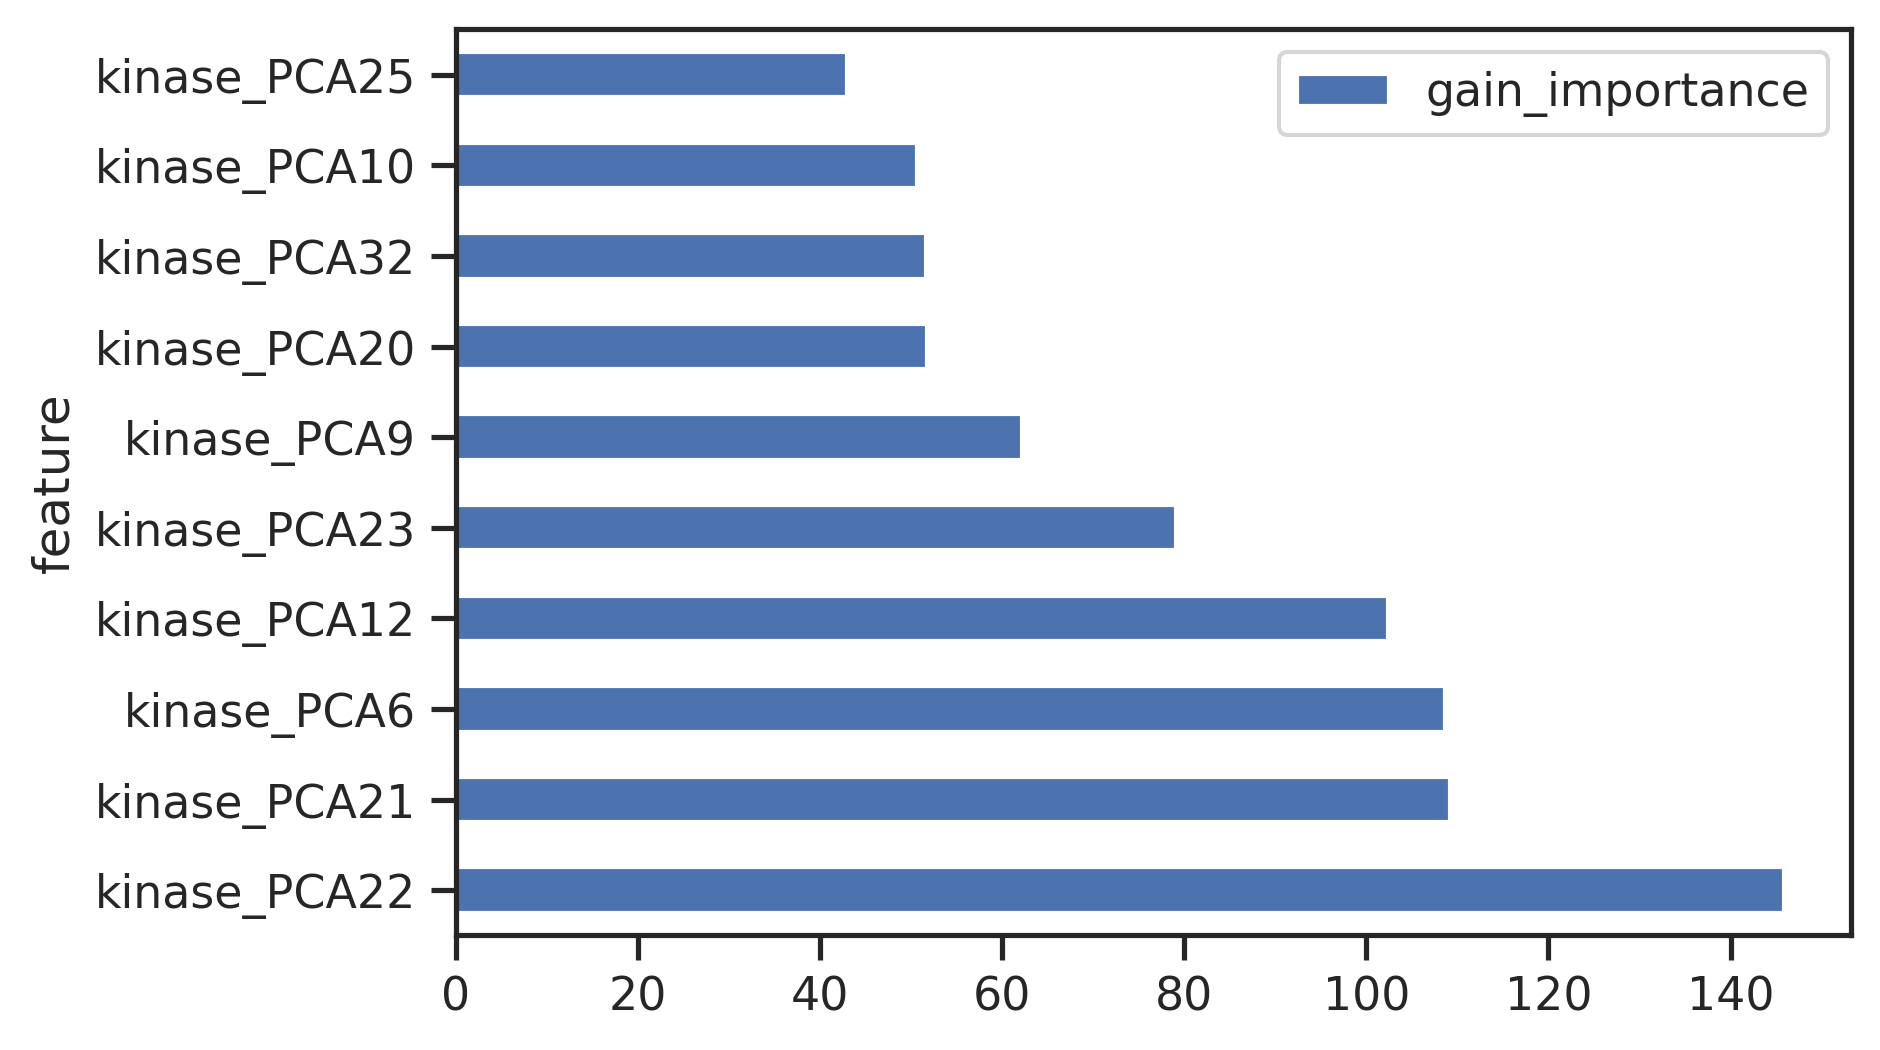

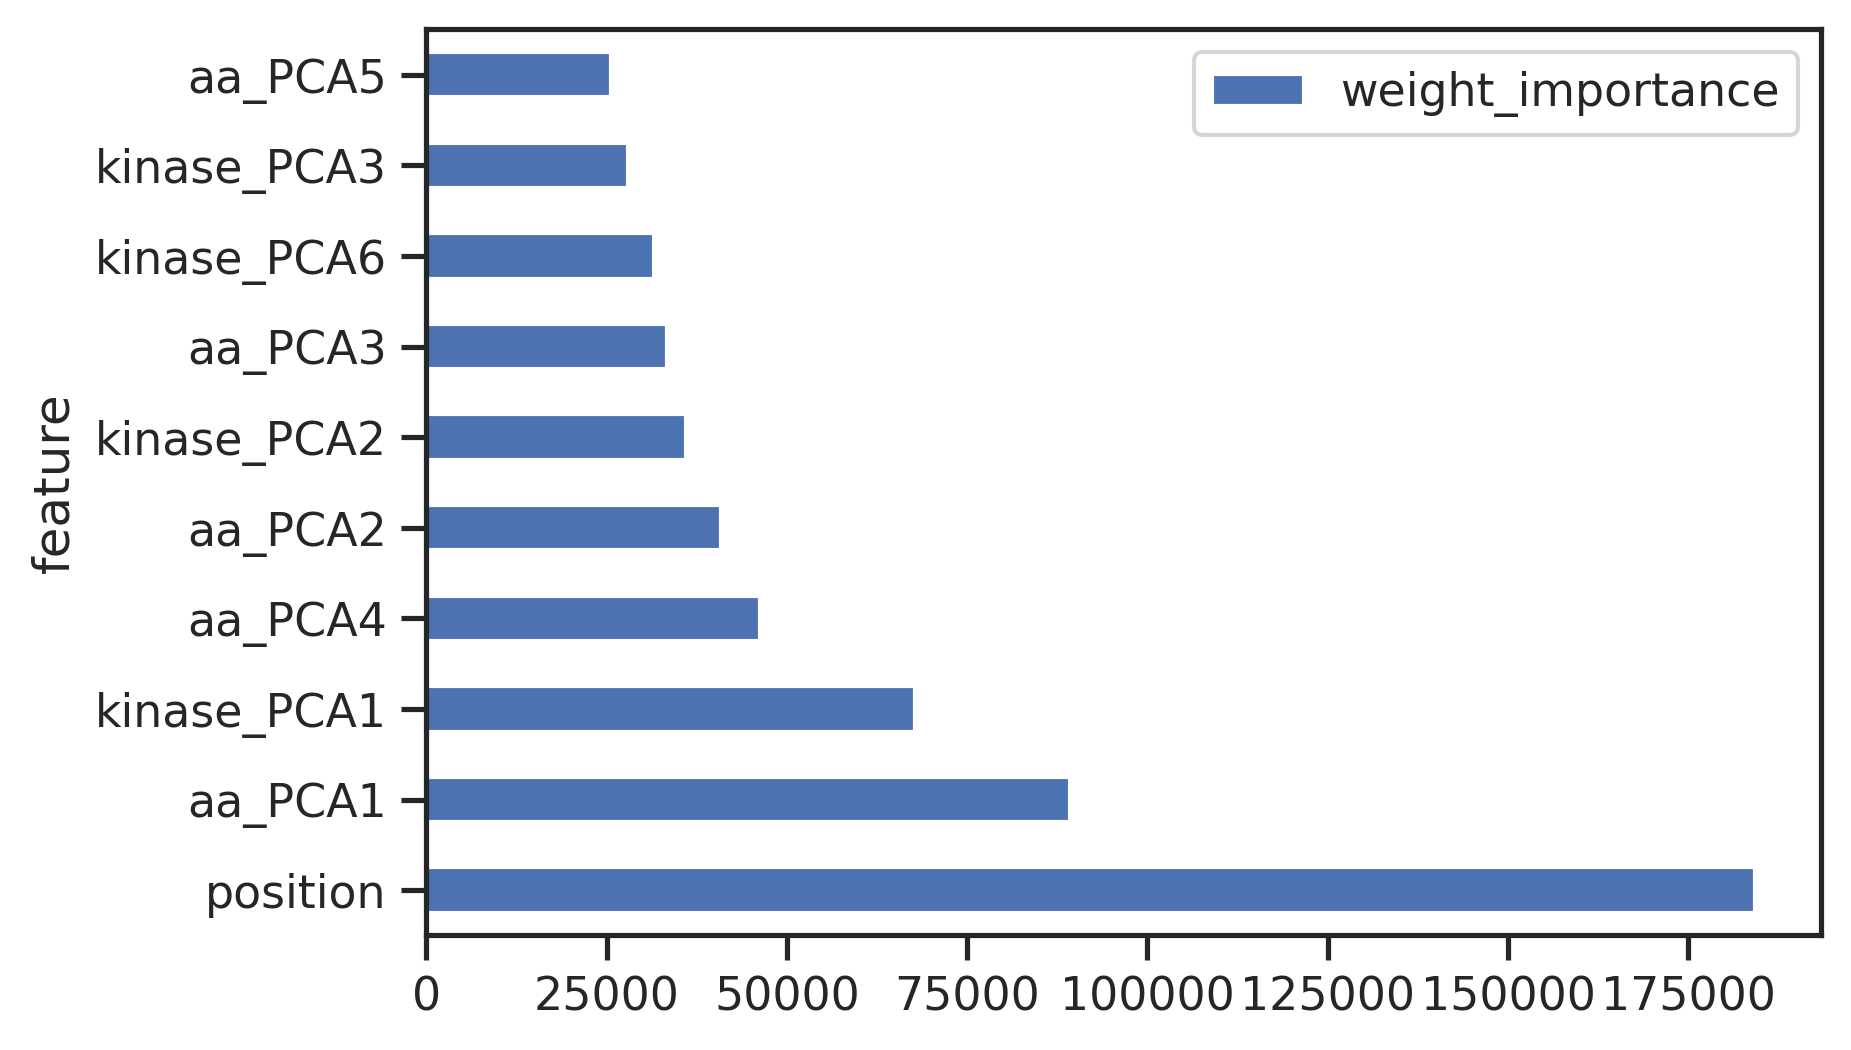

In [ ]:
FOLDS=5
pred_dfs = []
gains = []
weights = []
for fold, (train_idx, valid_idx) in enumerate(StratifiedGroupKFold(FOLDS).split(info.index.values, info.category,info.kinase)):
    print(f'# kinase in valid set: {info.loc[valid_idx].kinase.unique().shape[0]}')
    print(f'# kinase in train set: {info.loc[train_idx].kinase.unique().shape[0]}')
    pred_df, gain, weight = xgb_trainer(df, feat_col, target_col = 'target', test_index=valid_idx, model_file = f'model/fold{fold}.bin')
    pred_dfs.append(pred_df)
    gains.append(gain)
    weights.append(weight)
    break

## Save gain & weight importance

Save gain importance and weight importance of each fold to dataframes

In [ ]:
# gain importance
g = pd.concat(gains, axis=1, keys=range(len(gains)))

g.columns = ['gain_importance_'+ str(i) for i in range(FOLDS)]

In [ ]:
# weight importance
w = pd.concat(weights,axis=1,keys = range(len(weights)))

w.columns = ['weight_importance_'+ str(i) for i in range(FOLDS)]

In [ ]:
# g.to_csv('model/gains.csv')
# w.to_csv('model/weights.csv')

In [ ]:
g.head()

In [ ]:
w.head()

## Predict

Here's just an example. Suppose we prepared a test set

In [ ]:
show_doc(xgb_predict)

---

### xgb_predict

>      xgb_predict (df, feature_col, ID_col='ID', model_file='xgb_model.bin')

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | a dataframe that contains ID and features for prediction |
| feature_col |  |  | feature column name |
| ID_col | str | ID | ID column name |
| model_file | str | xgb_model.bin |  |

In [ ]:
test_idx = valid_idx

In [ ]:
test = df.loc[test_idx]

In [ ]:
test.head(2)

kinase substrate     target  position aa  A  C  D  E  F  G  H  I  K  L  M  \
0   AAK1       -5P  15.845517        -5  P  0  0  0  0  0  0  0  0  0  0  0   
5   AKT3       -5P  15.962520        -5  P  0  0  0  0  0  0  0  0  0  0  0   

   N  P  Q  R  S  T  V  W  Y  t  y  AAK1  ACVR2A  ACVR2B  AKT1  AKT2  AKT3  \
0  0  1  0  0  0  0  0  0  0  0  0     1       0       0     0     0     0   
5  0  1  0  0  0  0  0  0  0  0  0     0       0       0     0     0     1   

   ALK2  ALK4  ALPHAK3  AMPKA1  AMPKA2  ANKRD3  ASK1  ATM  ATR  AURA  AURB  \
0     0     0        0       0       0       0     0    0    0     0     0   
5     0     0        0       0       0       0     0    0    0     0     0   

   AURC  BCKDK  BIKE  BMPR1A  BMPR1B  BMPR2  BRAF  BRSK1  BRSK2  BUB1  CAMK1A  \
0     0      0     0       0       0      0     0      0      0     0       0   
5     0      0     0       0       0      0     0      0      0     0       0   

   CAMK1B  CAMK1D  CAMK1G  CAMK2A  CAMK2B  CAMK2D  CAMK2G  CAMK4  CAMKK1  \
0       0       0       0       0       0       0       0      0       0   
5       0       0       0       0       0       0       0      0       0   

   CAMKK2  CAMLCK  CDC7  CDK1  CDK10  CDK12  CDK13  CDK14  CDK16  CDK17  \
0       0       0     0     0      0      0      0      0      0      0   
5       0       0     0     0      0      0      0      0      0      0   

   CDK18  CDK19  CDK2  CDK3  CDK4  CDK5  CDK6  CDK7  CDK8  CDK9  CDKL1  CDKL5  \
0      0      0     0     0     0     0     0     0     0     0      0      0   
5      0      0     0     0     0     0     0     0     0     0      0      0   

   CHAK1  CHAK2  CHK1  CHK2  CK1A  CK1A2  CK1D  CK1E  CK1G1  CK1G3  CK2A1  \
0      0      0     0     0     0      0     0     0      0      0      0   
5      0      0     0     0     0      0     0     0      0      0      0   

   CK2A2  CLK1  CLK2  CLK3  CLK4  COT  CRIK  DAPK1  DAPK2  DAPK3  DCAMKL1  \
0      0     0     0     0     0    0     0      0      0      0        0   
5      0     0     0     0     0    0     0      0      0      0        0   

   DCAMKL2  DLK  DMPK1  DNAPK  DRAK1  DSTYK  DYRK1A  DYRK1B  DYRK2  DYRK3  \
0        0    0      0      0      0      0       0       0      0      0   
5        0    0      0      0      0      0       0       0      0      0   

   DYRK4  EEF2K  ERK1  ERK2  ERK5  ERK7  FAM20C  GAK  GCK  GCN2  GRK1  GRK2  \
0      0      0     0     0     0     0       0    0    0     0     0     0   
5      0      0     0     0     0     0       0    0    0     0     0     0   

   GRK3  GRK4  GRK5  GRK6  GRK7  GSK3A  GSK3B  HASPIN  HGK  HIPK1  HIPK2  \
0     0     0     0     0     0      0      0       0    0      0      0   
5     0     0     0     0     0      0      0       0    0      0      0   

   HIPK3  HIPK4  HPK1  HRI  HUNK  ICK  IKKA  IKKB  IKKE  IRAK1  IRAK4  IRE1  \
0      0      0     0    0     0    0     0     0     0      0      0     0   
5      0      0     0    0     0    0     0     0     0      0      0     0   

   IRE2  JNK1  JNK2  JNK3  KHS1  KHS2  KIS  LATS1  LATS2  LKB1  LOK  LRRK2  \
0     0     0     0     0     0     0    0      0      0     0    0      0   
5     0     0     0     0     0     0    0      0      0     0    0      0   

   MAK  MAP3K15  MAPKAPK2  MAPKAPK3  MAPKAPK5  MARK1  MARK2  MARK3  MARK4  \
0    0        0         0         0         0      0      0      0      0   
5    0        0         0         0         0      0      0      0      0   

   MASTL  MEK1  MEK2  MEK5  MEKK1  MEKK2  MEKK3  MEKK6  MELK  MINK  MLK1  \
0      0     0     0     0      0      0      0      0     0     0     0   
5      0     0     0     0      0      0      0      0     0     0     0   

   MLK2  MLK3  MLK4  MNK1  MNK2  MOK  MOS  MPSK1  MRCKA  MRCKB  MSK1  MSK2  \
0     0     0     0     0     0    0    0      0      0      0     0     0   
5     0     0     0     0     0    0    0      0      0      0     0     0   

   MST1  MST2  MST3

In [ ]:
pred_test = xgb_predict(test, feat_col, ID_col = 'kinase', model_file = 'model/fold0.bin')

Check whether predict works

In [ ]:
(pred_test.preds.round(2) == pred_df.pred.round(2)).value_counts()

True    12078
dtype: int64

## Transform target/pred back

In [ ]:
pred_df.head()

label       pred
0   15.845517  16.214771
5   15.962520  16.510622
10  17.624320  17.831568
15  15.553056  17.284220
20  14.881759  16.441727

As we log transform the label, we need to transform them back

In [ ]:
pred_df = pred_df.apply(np.log)

Combine all info

In [ ]:
pred = pd.concat([pred_df, df[['kinase','substrate','position','aa']].loc[pred_df.index],info.loc[pred_df.index].drop(columns='kinase')], axis=1)

In [ ]:
pred.kinase.unique().shape

(61,)

In [ ]:
pred.head()

label       pred  kinase substrate  position aa Family  category  \
0   15.845517  16.214771    AAK1       -5P        -5  P  Other       NAK   
5   15.962520  16.510622    AKT3       -5P        -5  P    AGC  AKT/ROCK   
10  17.624320  17.831568  AMPKA2       -5P        -5  P   CAMK      AMPK   
15  15.553056  17.284220    AURA       -5P        -5  P  Other  AURK/PKA   
20  14.881759  16.441727  BMPR1A       -5P        -5  P    TKL     TGFBR   

   category_big  
0           NAK  
5    basophilic  
10   basophilic  
15   basophilic  
20  acidophilic

## Overall analysis

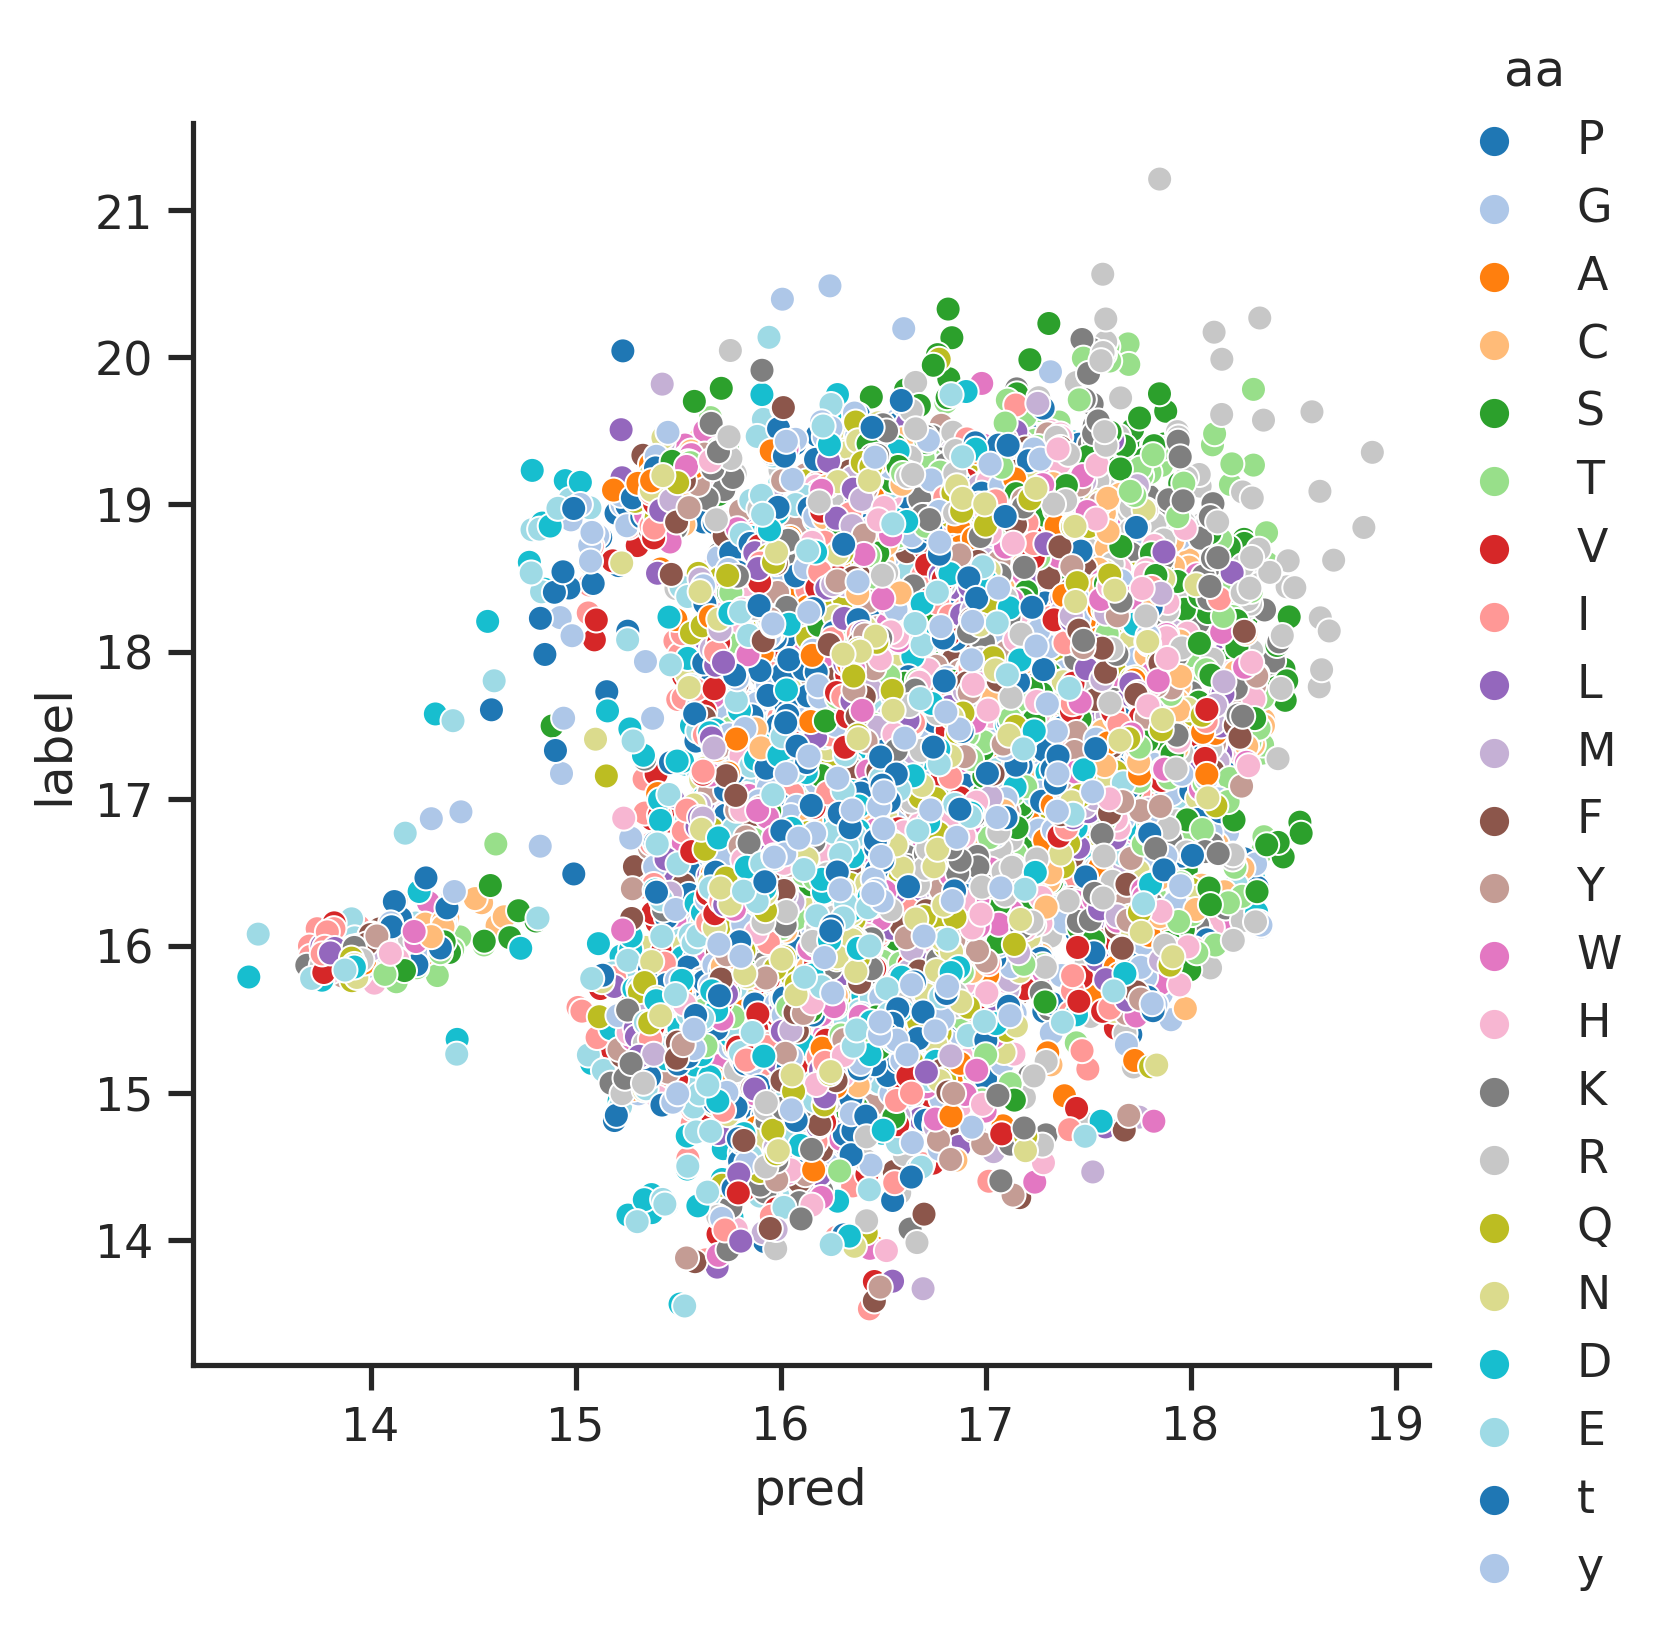

In [ ]:
sns.relplot(x=pred.pred, y=pred.label, hue = pred.aa,palette='tab20');

Check which substrate (position+aa) is favored by the model

In [ ]:
pred.groupby('substrate').pred.mean().sort_values(ascending=False)

substrate
-3R    2.853020
-2R    2.837955
-1R    2.835854
-4R    2.835313
2S     2.834817
         ...   
-2I    2.779780
-3I    2.779656
2E     2.778364
1E     2.759924
1D     2.756163
Name: pred, Length: 198, dtype: float32

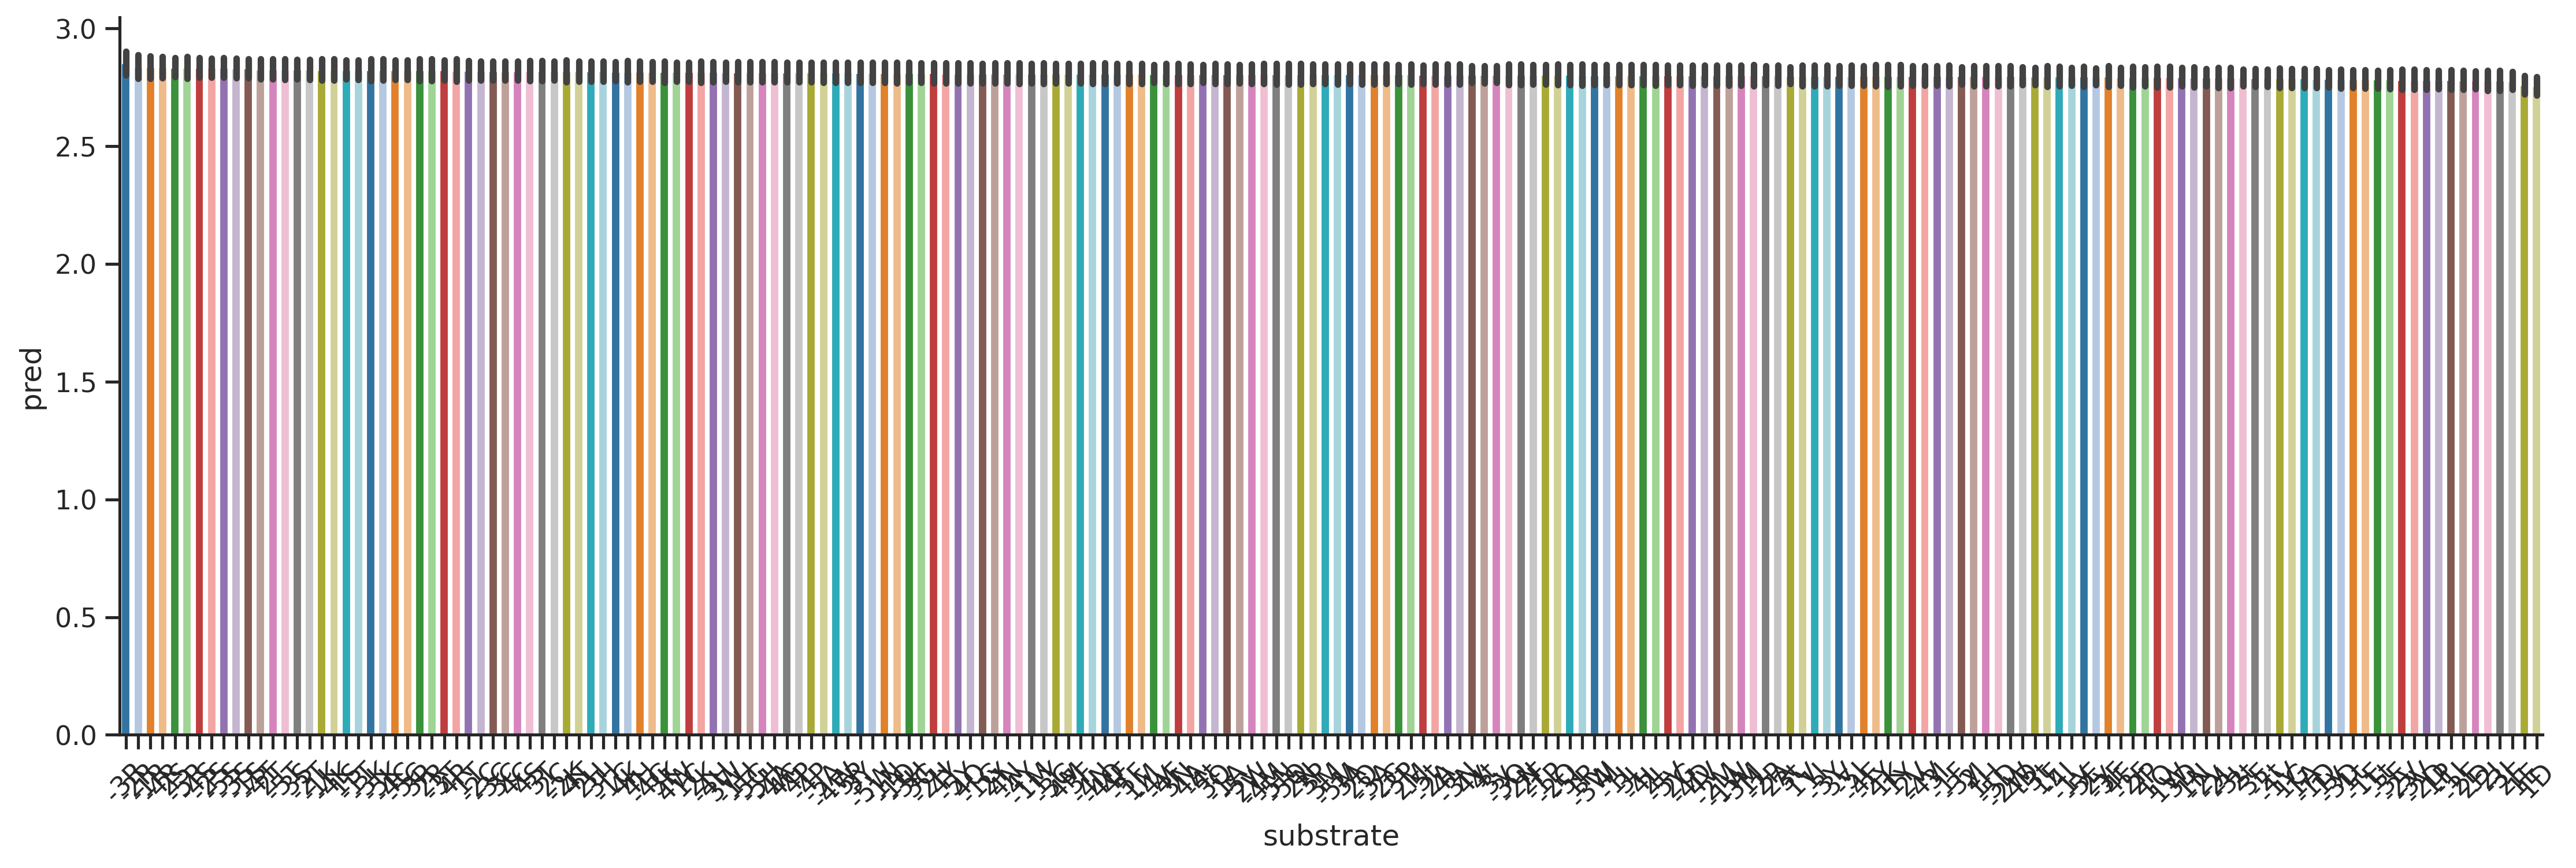

In [ ]:
plot_bar(pred, 'pred','substrate', circle = False)

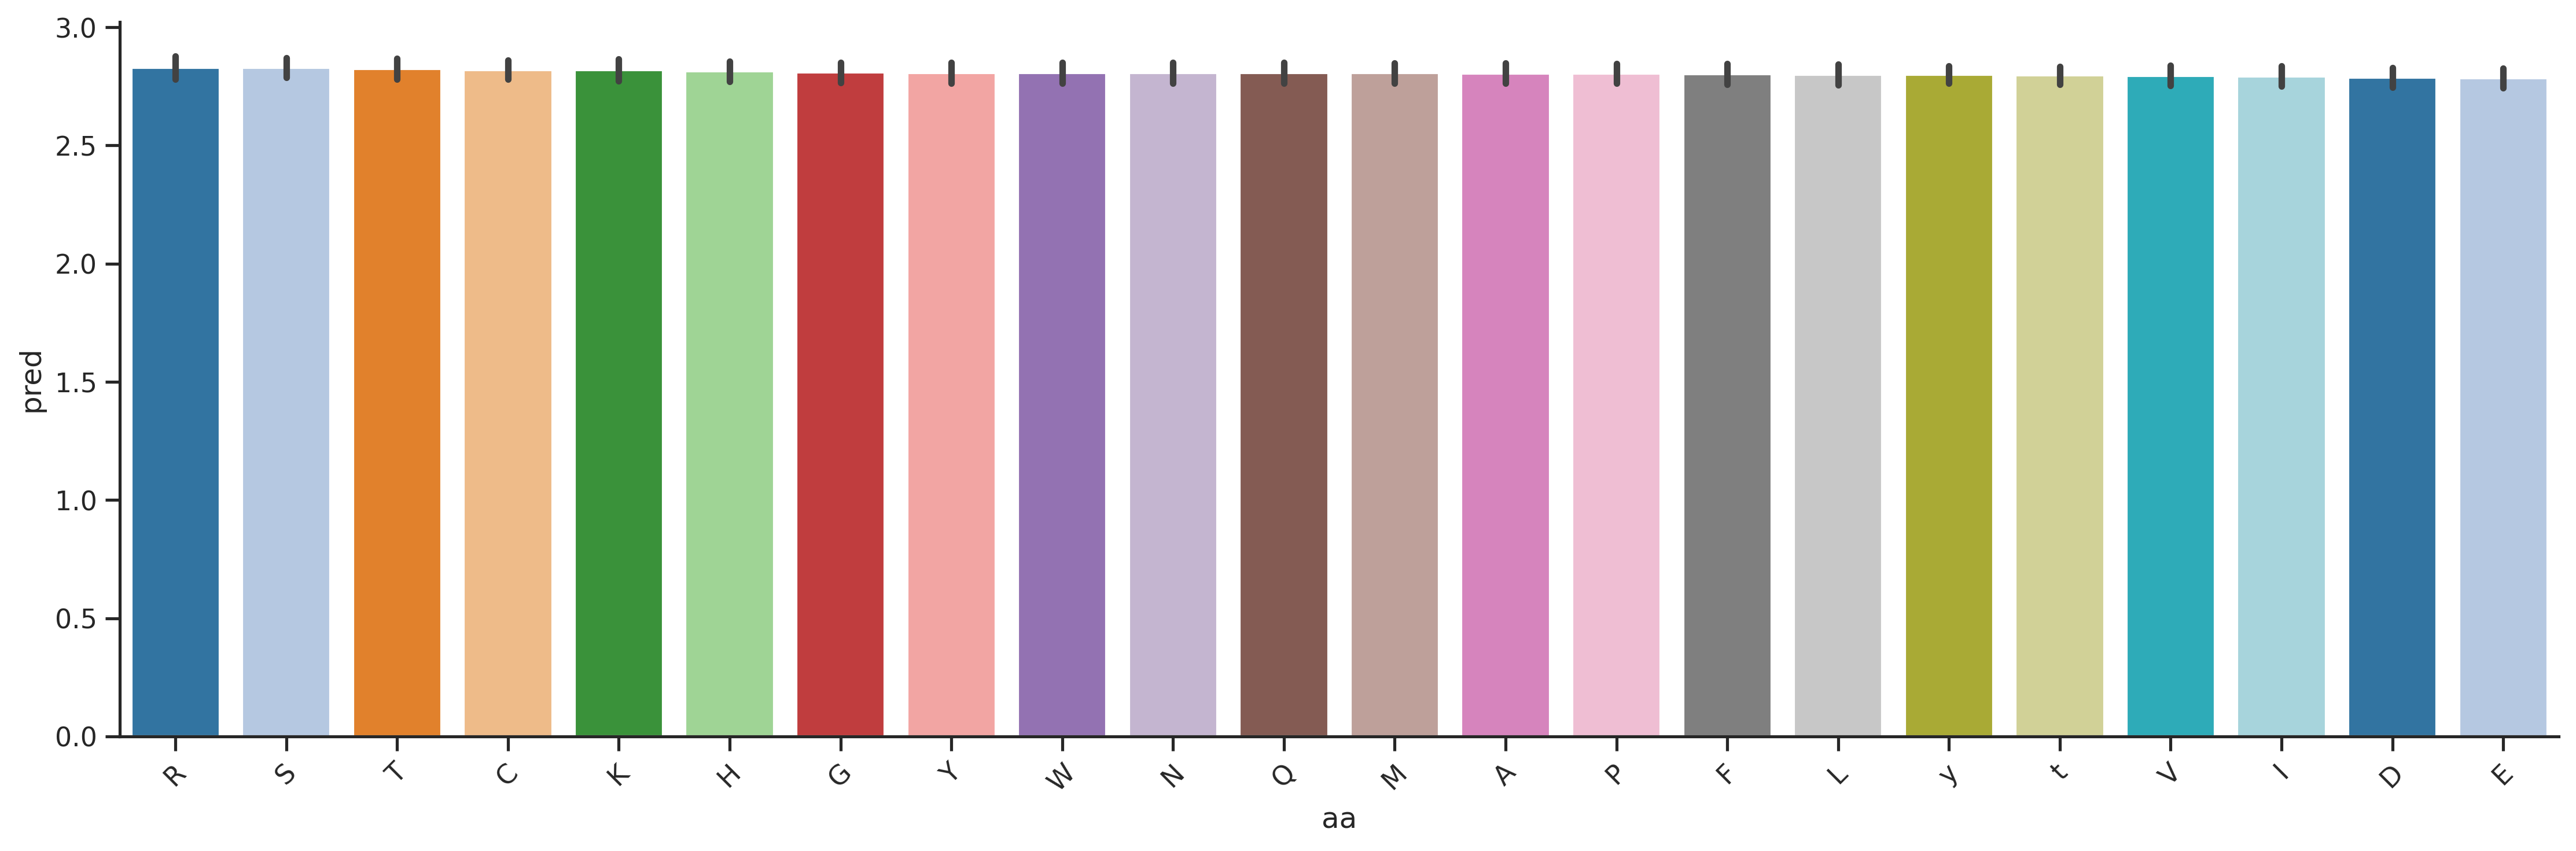

In [ ]:
plot_bar(pred, 'pred','aa', circle = False)

## Analysis Pearson

In [ ]:
pred.groupby('kinase')[['label','pred']].corr()

label      pred
kinase                          
AAK1   label  1.000000  0.449309
       pred   0.449309  1.000000
AKT3   label  1.000000  0.900176
       pred   0.900176  1.000000
AMPKA2 label  1.000000  0.644564
...                ...       ...
TTBK2  pred   0.564179  1.000000
WNK4   label  1.000000  0.707333
       pred   0.707333  1.000000
YSK1   label  1.000000  0.837358
       pred   0.837358  1.000000

[122 rows x 2 columns]

In [ ]:
pearson = pred.groupby('kinase')[['label','pred']].corr().pred.loc[::2].reset_index()

In [ ]:
# Get the absolute value of pearson correlation, and name the column pearson
pearson['pearson'] = abs(pearson.pred)

In [ ]:
pearson.head()

kinase level_1      pred   pearson
0    AAK1   label  0.449309  0.449309
1    AKT3   label  0.900176  0.900176
2  AMPKA2   label  0.644564  0.644564
3    AURA   label  0.337485  0.337485
4  BMPR1A   label  0.717510  0.717510

Collect information for this df

In [ ]:
pearson = pearson.merge(kinase_info, 'left')

In [ ]:
pearson.head()

kinase level_1      pred   pearson Family  category category_big
0    AAK1   label  0.449309  0.449309  Other       NAK          NAK
1    AKT3   label  0.900176  0.900176    AGC  AKT/ROCK   basophilic
2  AMPKA2   label  0.644564  0.644564   CAMK      AMPK   basophilic
3    AURA   label  0.337485  0.337485  Other  AURK/PKA   basophilic
4  BMPR1A   label  0.717510  0.717510    TKL     TGFBR  acidophilic

In [ ]:
print(f'The average pearson value across kinases in valid set is : {pearson.pearson.mean().round(4)}')

The average pearson value across kinases in valid set is : 0.6253


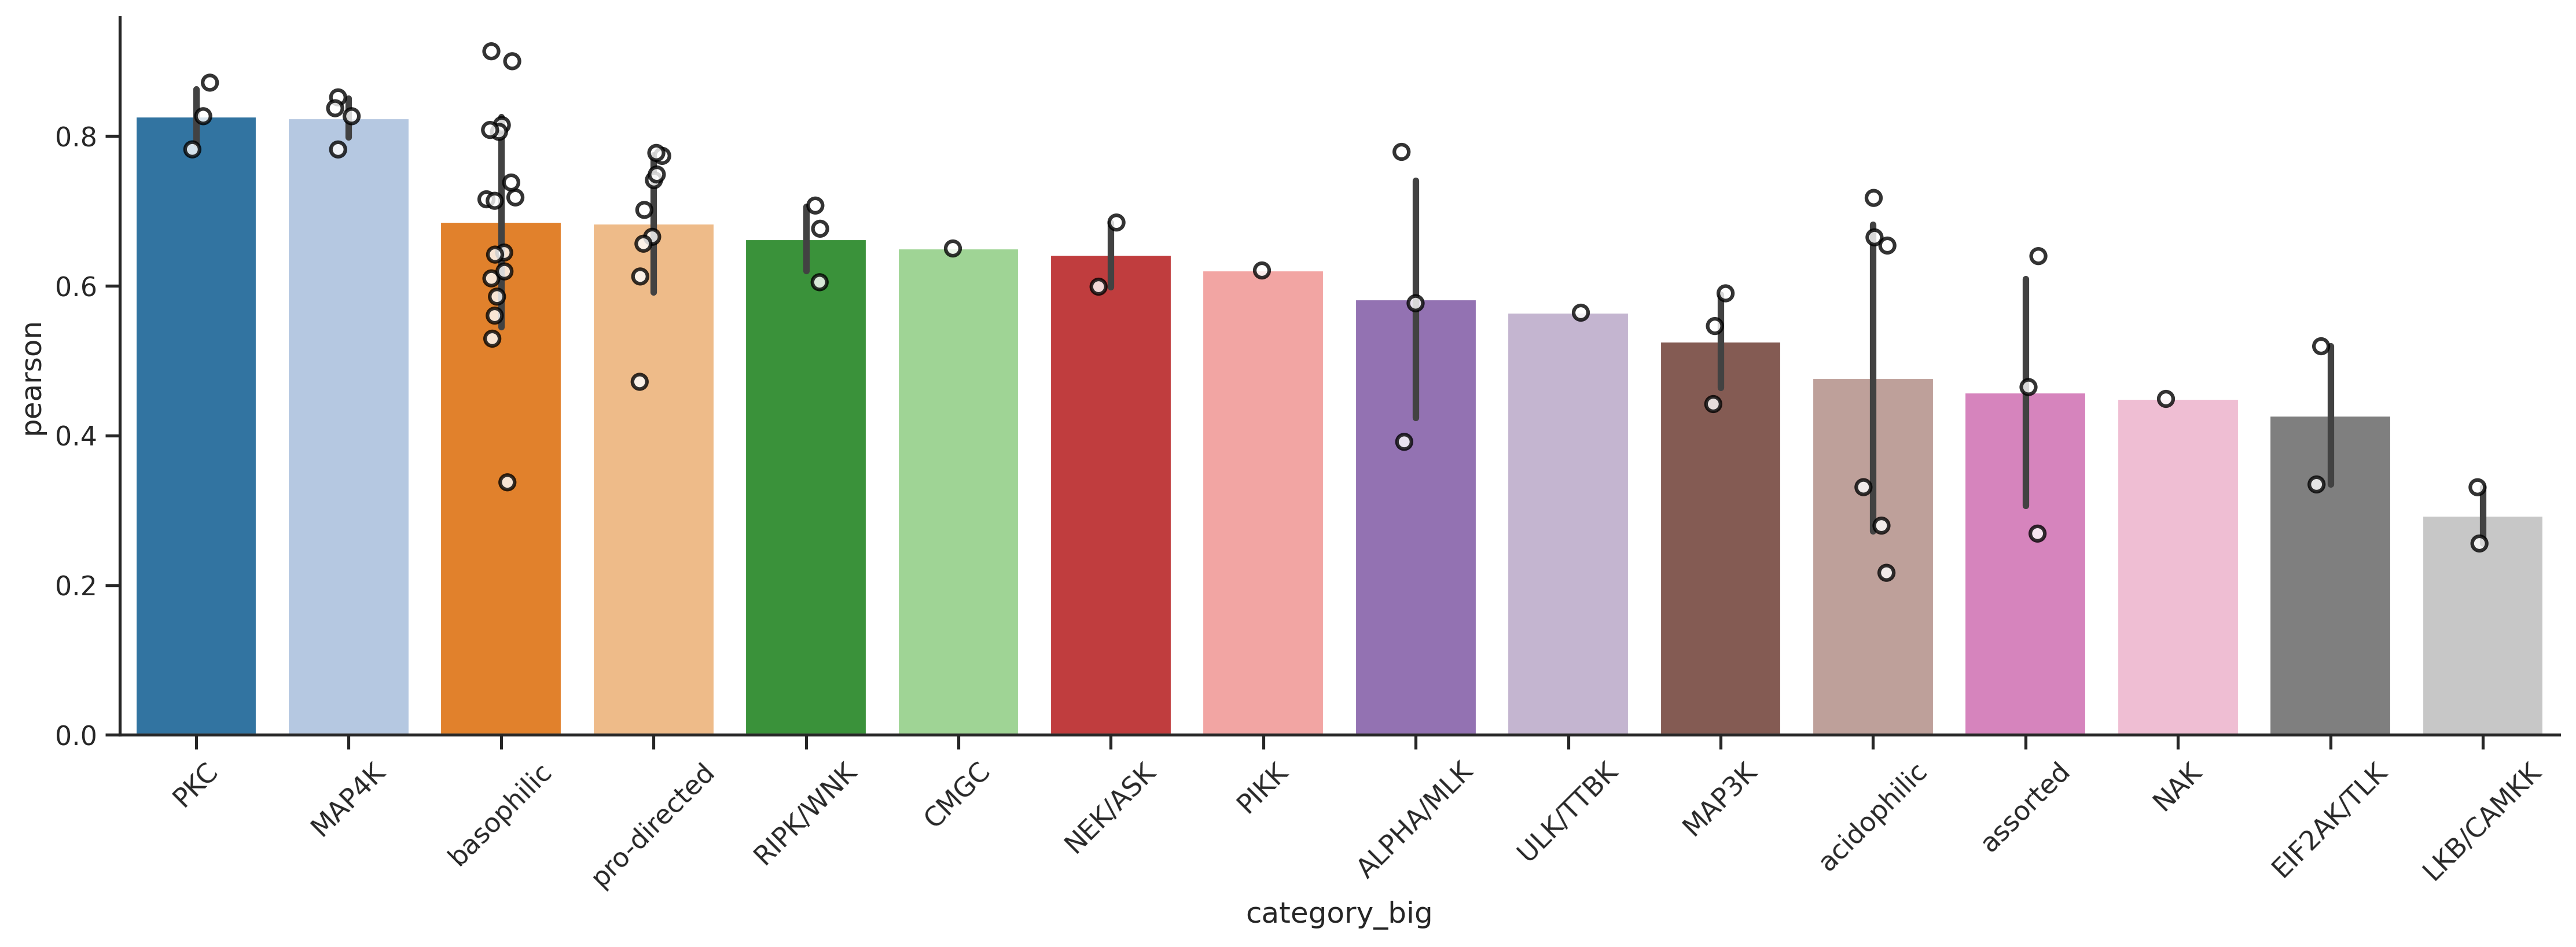

In [ ]:
plot_bar(pearson,'pearson','category_big')

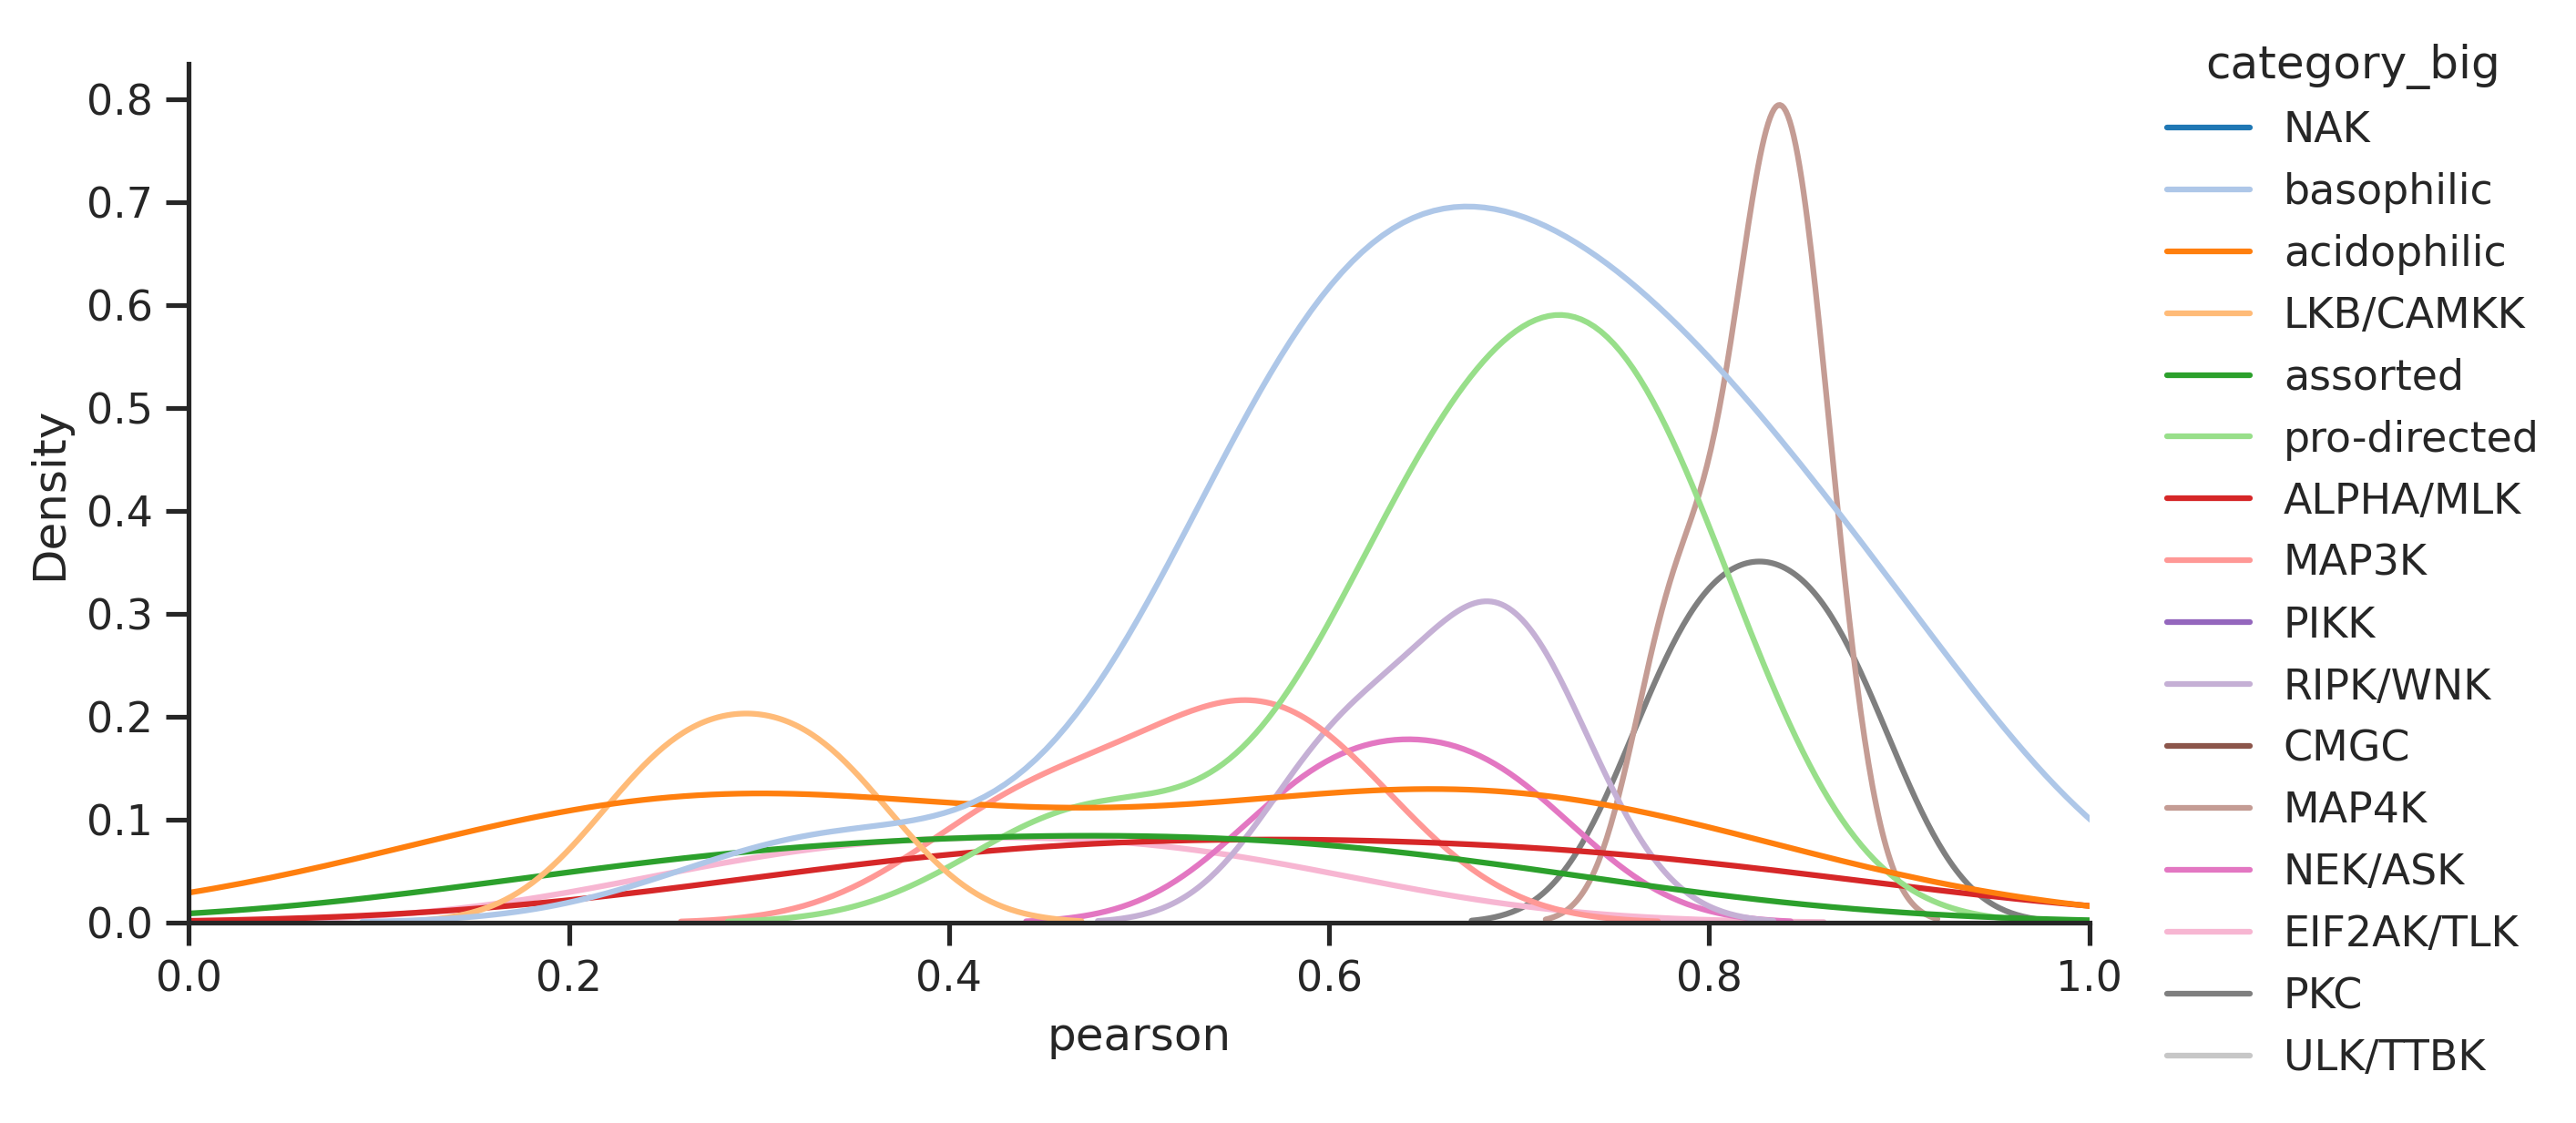

In [ ]:
sns.displot(pearson,
            x = 'pearson',
            aspect=2,
            kind='kde',
            hue = 'category_big',
            palette = 'tab20',
            height=4,
            warn_singular=False
           ).set(xlim=(0,1));

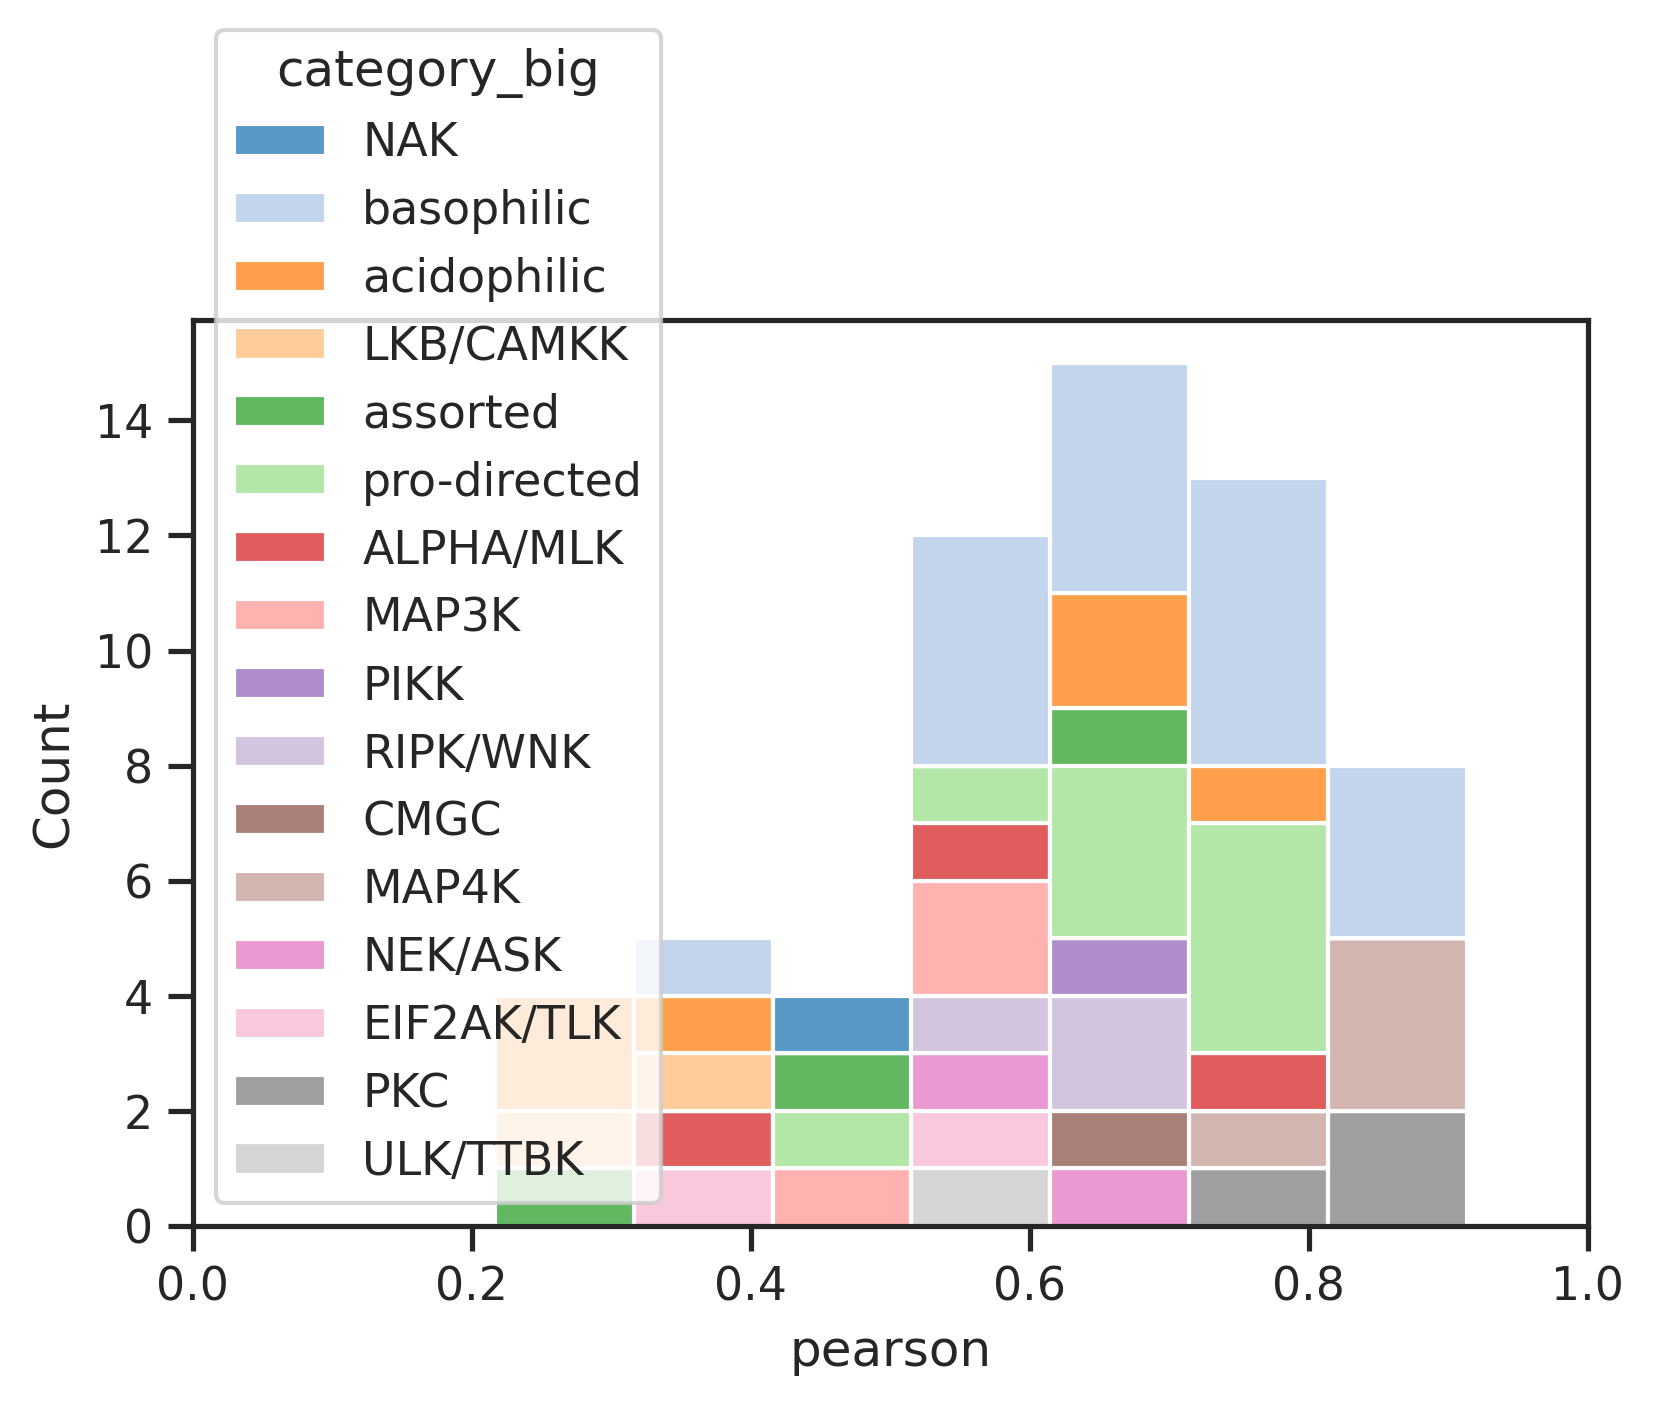

In [ ]:
sns.histplot(data=pearson,
             x='pearson',
             hue='category_big',
             palette='tab20',
             multiple='stack',
            ).set(xlim=(0, 1));

## Individual Kinase

In [ ]:
max_group = pearson.groupby('category_big').apply(lambda r: r.loc[r['pearson'].idxmax()]).reset_index(drop=True).sort_values('pearson',ascending=False)

In [ ]:
min_group = pearson.groupby('category_big').apply(lambda r: r.loc[r['pearson'].idxmin()]).reset_index(drop=True).sort_values('pearson',ascending=False)

In [ ]:
min_group

kinase level_1      pred   pearson Family    category  category_big
9    PHKG1   label  0.782376  0.782376   CAMK         PKC           PKC
5    MYO3B   label  0.782264  0.782264    STE       MAP4K         MAP4K
1      ICK   label  0.650664  0.650664   CMGC        CMGC          CMGC
8    DNAPK   label  0.620667  0.620667   PIKK        PIKK          PIKK
10  HASPIN   label  0.604876  0.604876  Other    RIPK/WNK      RIPK/WNK
7    NEK11   label  0.598925  0.598925  Other     NEK/ASK       NEK/ASK
11   TTBK2   label  0.564179  0.564179    CK1    ULK/TTBK      ULK/TTBK
15   HIPK4   label  0.471828  0.471828   CMGC   DYRK/HIPK  pro-directed
6     AAK1   label  0.449309  0.449309  Other         NAK           NAK
4      COT   label  0.442055  0.442055    STE       MAP3K         MAP3K
0    CHAK2   label  0.391595  0.391595  Alpha   ALPHA/MLK     ALPHA/MLK
14    AURA   label  0.337485  0.337485  Other    AURK/PKA    basophilic
2   TGFBR2   label  0.334672  0.334672    TKL  EIF2AK/TLK    EIF2AK/TLK
13    CDC7   label  0.268988  0.268988  Other    assorted      assorted
3    PINK1   label  0.255742  0.255742  Other   LKB/CAMKK     LKB/CAMKK
12    PLK2   label -0.216588  0.216588  Other         PLK   acidophilic

In [ ]:
max_group

kinase level_1      pred   pearson Family    category  category_big
14   MRCKB   label  0.913463  0.913463    AGC    AKT/ROCK    basophilic
9     PKCE   label  0.871546  0.871546    AGC         PKC           PKC
5      LOK   label  0.851899  0.851899    STE       MAP4K         MAP4K
0     PKN2   label  0.779063  0.779063    AGC   ALPHA/MLK     ALPHA/MLK
15    ERK2   label  0.777658  0.777658   CMGC        MAPK  pro-directed
12  BMPR1A   label  0.717510  0.717510    TKL       TGFBR   acidophilic
10    WNK4   label  0.707333  0.707333  Other    RIPK/WNK      RIPK/WNK
7     NEK9   label  0.684658  0.684658  Other     NEK/ASK       NEK/ASK
1      ICK   label  0.650664  0.650664   CMGC        CMGC          CMGC
13   PDHK1   label  0.639772  0.639772   PDHK    assorted      assorted
8    DNAPK   label  0.620667  0.620667   PIKK        PIKK          PIKK
4    MEKK1   label  0.590048  0.590048    STE       MAP3K         MAP3K
11   TTBK2   label  0.564179  0.564179    CK1    ULK/TTBK      ULK/TTBK
2     NEK7   label  0.519339  0.519339  Other  EIF2AK/TLK    EIF2AK/TLK
6     AAK1   label  0.449309  0.449309  Other         NAK           NAK
3   CAMKK1   label  0.330915  0.330915  Other   LKB/CAMKK     LKB/CAMKK

### Max group

In [ ]:
# for k in max_group.kinase:
#     print(f'------{k}------')
#     kinase_report(pred,k)

### Min group

In [ ]:
# for k in min_group.kinase:
#     print(f'------{k}------')
#     kinase_report(pred,k)